## Statistical Inference

In [12]:
# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, kstest, norm
import math

In [13]:
#Read the dataset for the frequent pilot users without outliers
df = pd.read_csv("patients/sunepeis_xoris_outliers.csv", low_memory=False).drop(columns = ['Unnamed: 0'])

In [14]:
#Check if columns follow the normal distribution
columns = list(df.drop(columns=['TIME','PATIENT_CODE', 'DATE', 'CATEGORY', 'GENDER', 'AGE', 'PPG', 'PPG_united']))
for column in columns:
    stat, p = kstest(df[column].dropna(), cdf='norm')
    if p < 0.05:
        print column, 'follows the normal distribution'

plt.rcParams.update({'font.size': 12})

FEF2575 follows the normal distribution
FEV1 follows the normal distribution
FEV1_FVC follows the normal distribution
FEV6 follows the normal distribution
FVC follows the normal distribution
PEF follows the normal distribution
bpm_sys follows the normal distribution
bpm_dia follows the normal distribution
SpO2 follows the normal distribution
heartbeat follows the normal distribution
perfusionIndex follows the normal distribution
PPG_skew follows the normal distribution
PPG_kurt follows the normal distribution
PPG_period follows the normal distribution


p-value for FEF2575 = 0.0001053367445997203
FEF2575 is significantly different between women and men


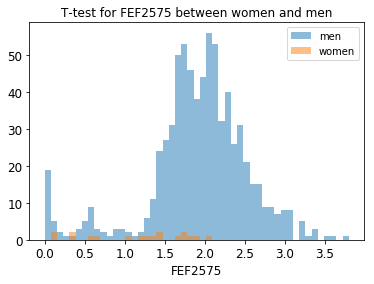

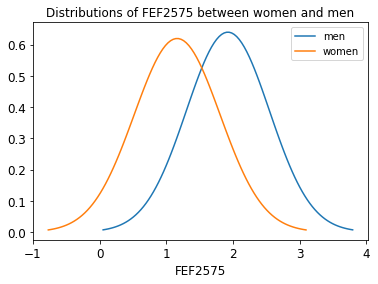

p-value for FEV1 = 1.1490484084858517e-10
FEV1 is significantly different between women and men


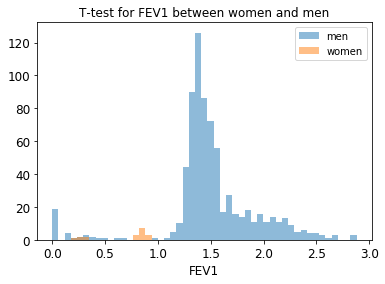

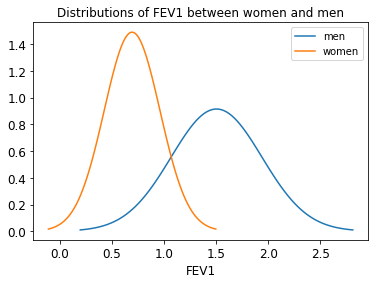

p-value for FEV1_FVC = 0.1333608986088117
FEV1_FVC is NOT significantly different between women and men


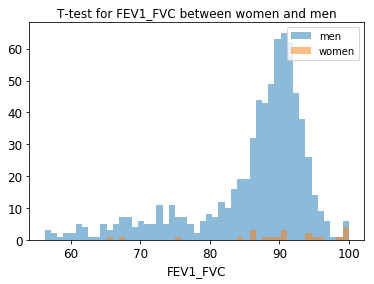

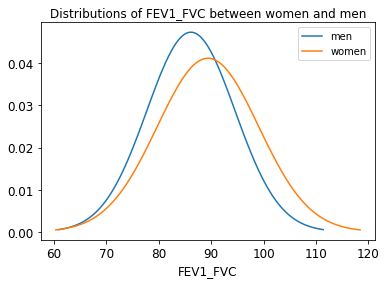

p-value for FEV6 = 0.004480605511758619
FEV6 is significantly different between women and men


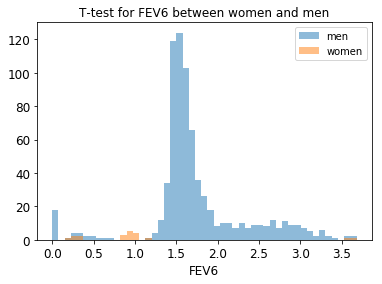

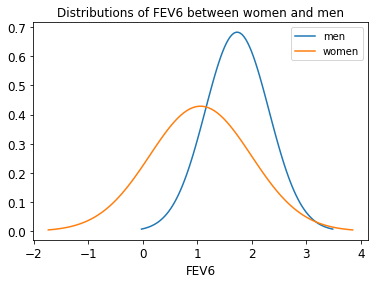

p-value for FVC = 0.02257680016241423
FVC is significantly different between women and men


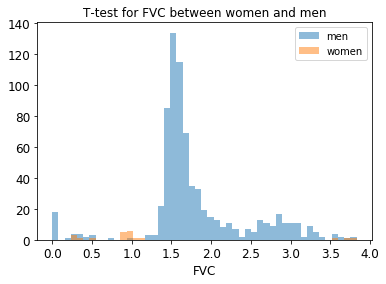

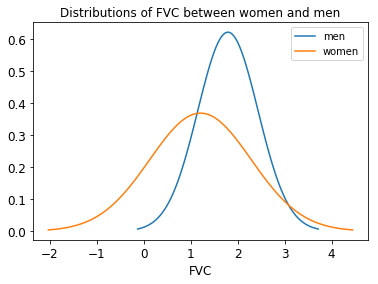

p-value for PEF = 0.5645004423431178
PEF is NOT significantly different between women and men


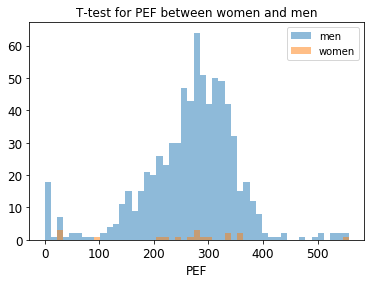

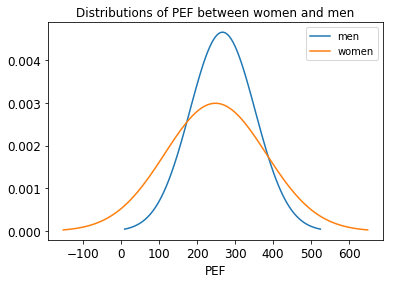

p-value for bpm_sys = 9.734630324196489e-84
bpm_sys is significantly different between women and men


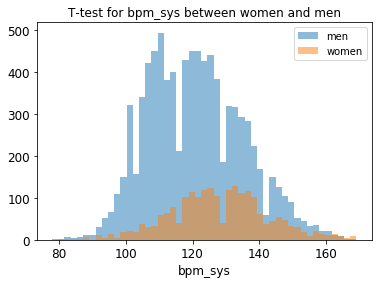

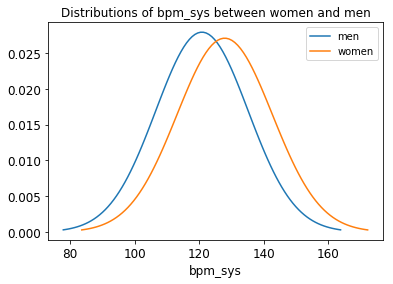

p-value for bpm_dia = 9.380079191815203e-12
bpm_dia is significantly different between women and men


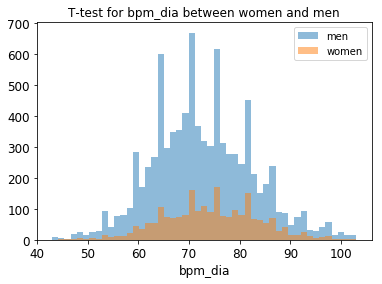

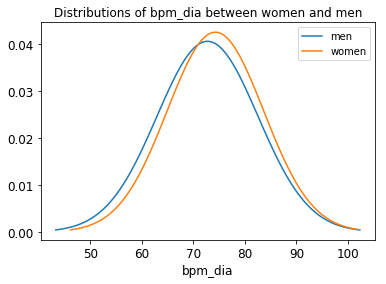

p-value for SpO2 = 3.8436912833536457e-287
SpO2 is significantly different between women and men


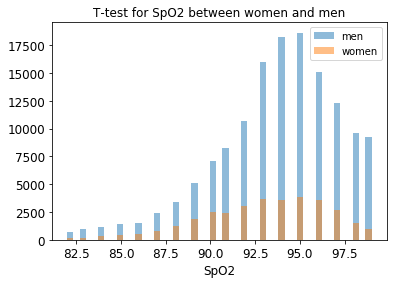

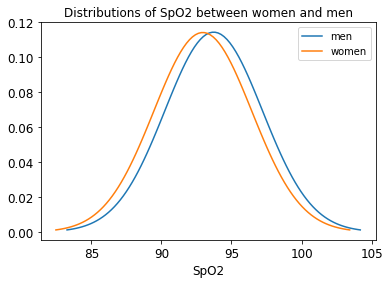

p-value for heartbeat = 0.0
heartbeat is significantly different between women and men


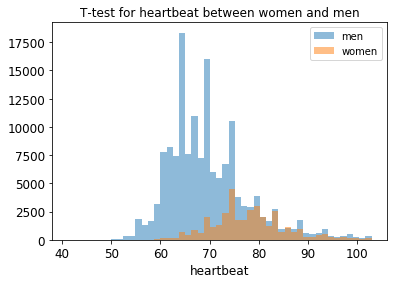

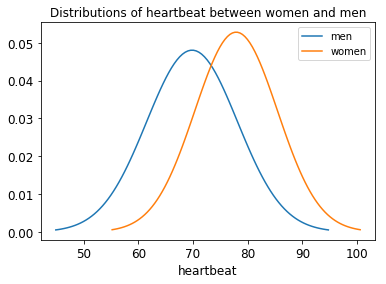

p-value for perfusionIndex = 0.0
perfusionIndex is significantly different between women and men


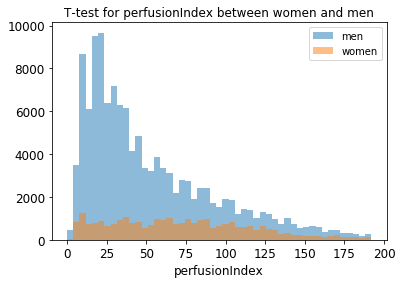

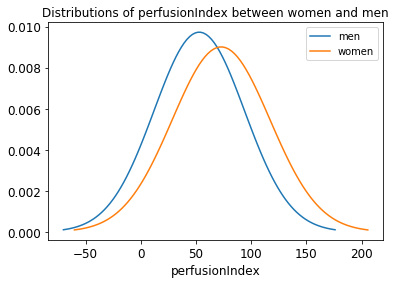

p-value for PPG_skew = 4.231615010004724e-21
PPG_skew is significantly different between women and men


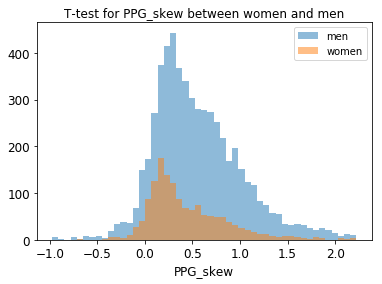

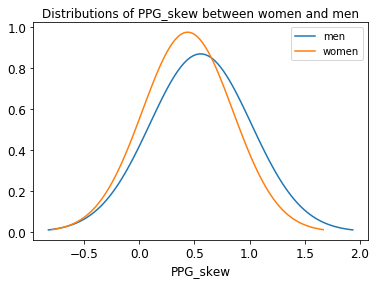

p-value for PPG_kurt = 1.70276504713253e-10
PPG_kurt is significantly different between women and men


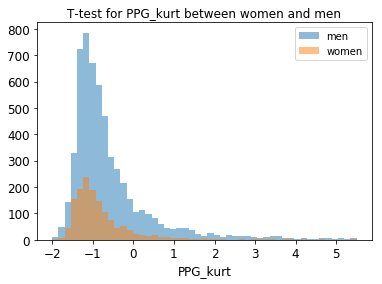

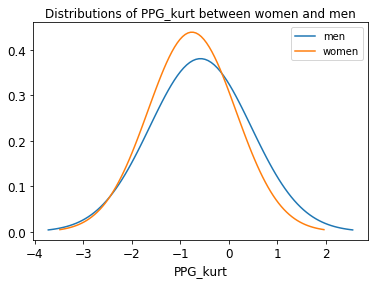

p-value for PPG_period = 8.367322403682799e-36
PPG_period is significantly different between women and men


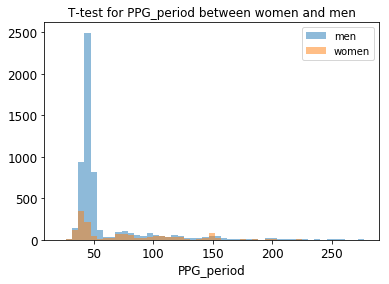

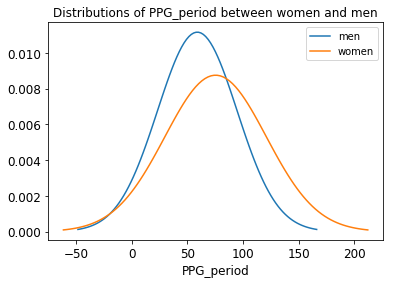

In [15]:
#Check if columns are different between women and men using Welch’s t-test
df2 = df[df['GENDER'] == 1].drop(columns=['TIME','PATIENT_CODE', 'DATE', 'CATEGORY', 'GENDER', 'AGE', 'PPG', 'PPG_united'])
df3 = df[df['GENDER'] == 2].drop(columns=['TIME','PATIENT_CODE', 'DATE', 'CATEGORY', 'GENDER', 'AGE', 'PPG', 'PPG_united'])
for column in columns:
    if (len(df2[column].dropna()) !=0) & (len(df3[column].dropna()) !=0):
        stat, p = ttest_ind(df2[column].dropna(), df3[column].dropna(), equal_var=False)
        print 'p-value for', column, '=', p
        if p < 0.05:
            print column, 'is significantly different between women and men'
        else:
            print column, 'is NOT significantly different between women and men'
        bins = np.linspace(np.minimum(df2[column].min(), df3[column].min()), np.maximum(df2[column].max(), df3[column].max()), 50)
        plt.hist(df2[column].dropna(), bins, alpha=0.5, label='men')
        plt.hist(df3[column].dropna(), bins, alpha=0.5, label='women')
        plt.legend(loc='upper right', prop={'size': 10})
        plt.xlabel(column)
        plt.title('T-test for ' + column + ' between women and men', fontsize=12)
        plt.savefig('patients/ttest/' + column + 'women_men.svg', format='svg', dpi=600, bbox_inches = "tight")
        plt.show()
        mu1 = df2[column].dropna().mean()
        variance1 = df2[column].dropna().var()
        sigma1 = math.sqrt(variance1)
        x1 = np.linspace(mu1 - 3*sigma1, mu1 + 3*sigma1, 100)
        mu2 = df3[column].dropna().mean()
        variance2 = df3[column].dropna().var()
        sigma2 = math.sqrt(variance2)
        x2 = np.linspace(mu2 - 3*sigma2, mu2 + 3*sigma2, 100)
        plt.plot(x1,norm.pdf(x1, mu1, sigma1), label='men')
        plt.plot(x2,norm.pdf(x2, mu2, sigma2), label='women')
        plt.legend(loc='upper right', prop={'size': 10})
        plt.xlabel(column)
        plt.title('Distributions of ' + column + ' between women and men', fontsize=12)
        plt.savefig('patients/ttest/' + column + 'women_men2.svg', format='svg', dpi=600, bbox_inches = "tight")
        plt.show()
    else:
        print 'cannot calculate', column, 'because of nan values'


cannot calculate FEF2575 because of nan values
cannot calculate FEV1 because of nan values
p-value for FEV1_FVC = 0.0005851373340046723
FEV1_FVC is significantly different between patients from pilot Athens and remote pilots


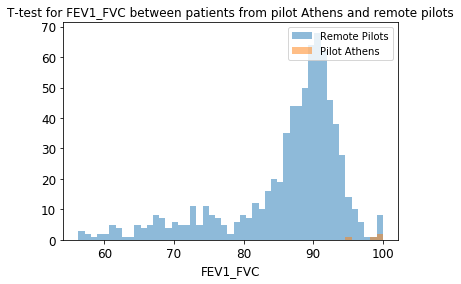

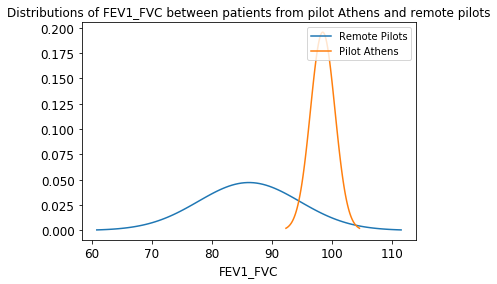

p-value for FEV6 = 0.002883516424530072
FEV6 is significantly different between patients from pilot Athens and remote pilots


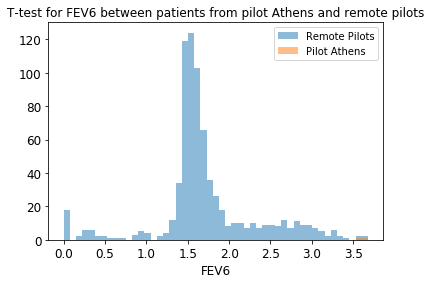

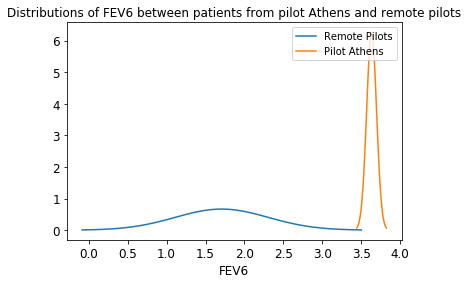

p-value for FVC = 0.0004197722727246886
FVC is significantly different between patients from pilot Athens and remote pilots


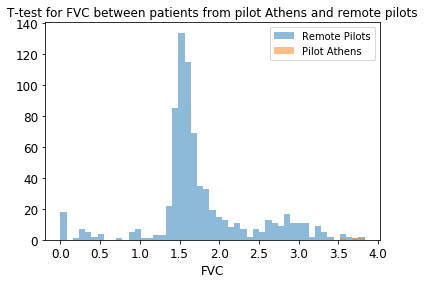

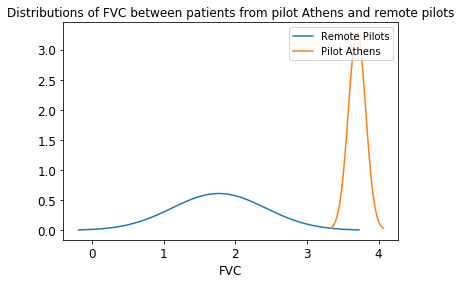

cannot calculate PEF because of nan values
p-value for bpm_sys = 5.52040558141934e-12
bpm_sys is significantly different between patients from pilot Athens and remote pilots


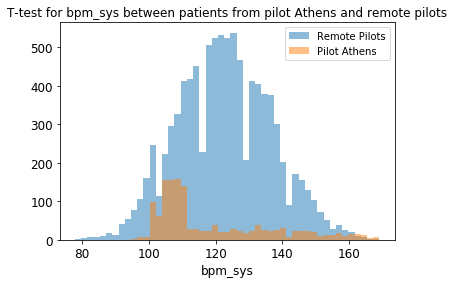

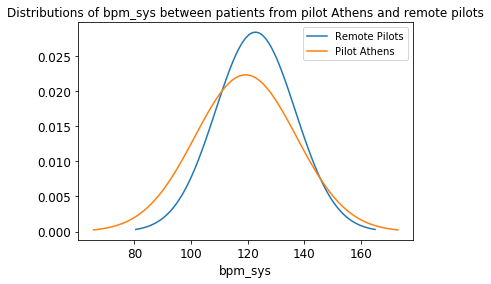

p-value for bpm_dia = 1.7092178868002557e-06
bpm_dia is significantly different between patients from pilot Athens and remote pilots


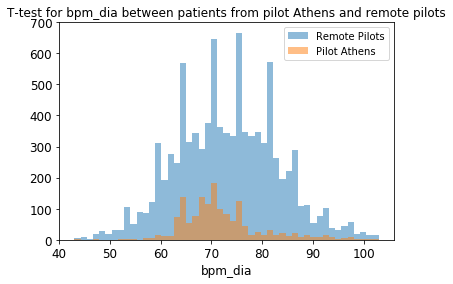

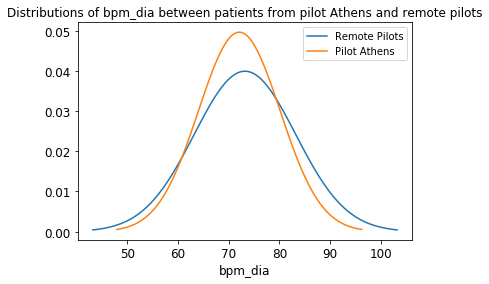

p-value for SpO2 = 3.554723340192662e-56
SpO2 is significantly different between patients from pilot Athens and remote pilots


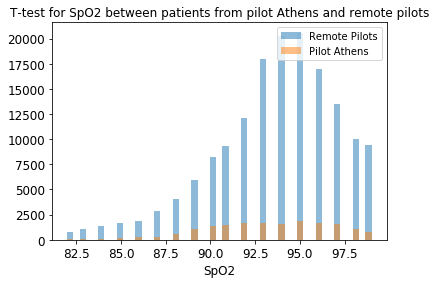

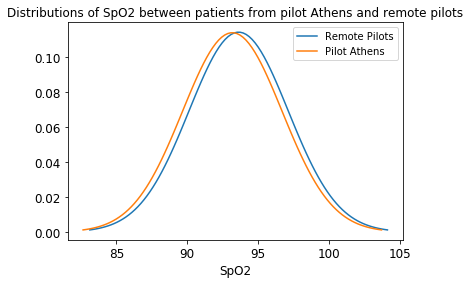

p-value for heartbeat = 0.0
heartbeat is significantly different between patients from pilot Athens and remote pilots


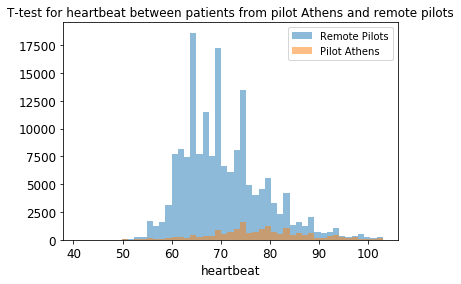

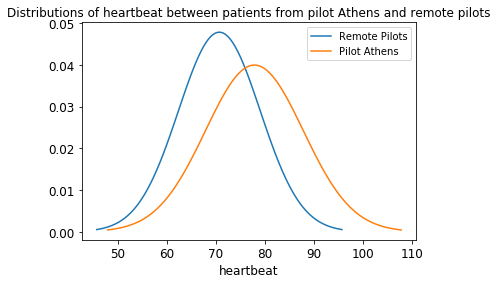

p-value for perfusionIndex = 0.0
perfusionIndex is significantly different between patients from pilot Athens and remote pilots


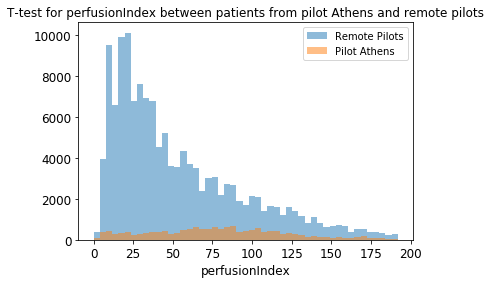

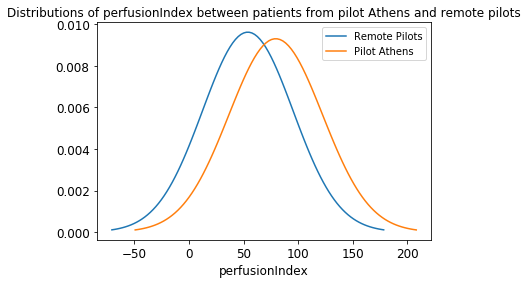

p-value for PPG_skew = 3.4519548397546584e-46
PPG_skew is significantly different between patients from pilot Athens and remote pilots


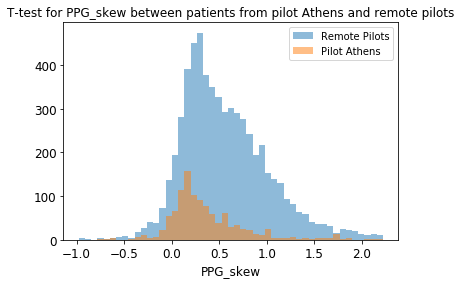

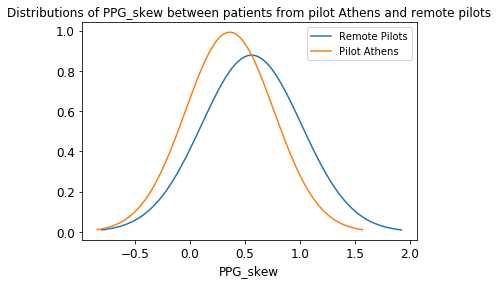

p-value for PPG_kurt = 1.568743384818745e-21
PPG_kurt is significantly different between patients from pilot Athens and remote pilots


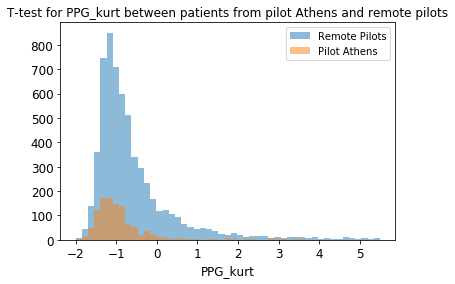

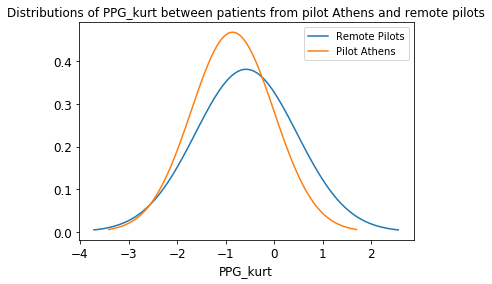

p-value for PPG_period = 4.521300021168656e-29
PPG_period is significantly different between patients from pilot Athens and remote pilots


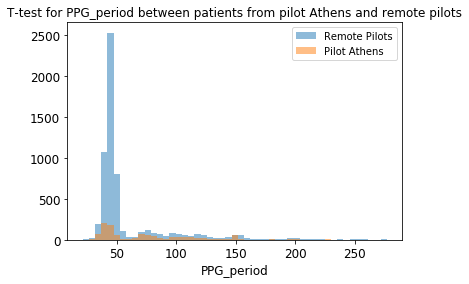

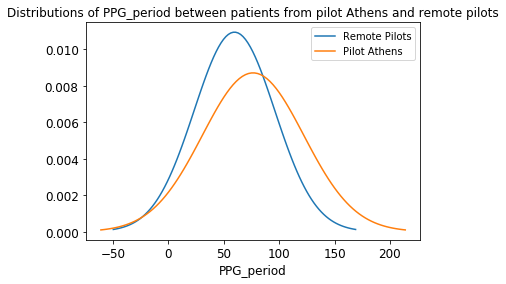

In [25]:
#Check if columns are different between patients from pilot Athens and the rest pilots using Welch’s t-test
df2 = df[~df['CATEGORY'].isin(['Pilot Athens'])].drop(columns=['TIME','PATIENT_CODE', 'DATE', 'CATEGORY', 'GENDER', 'AGE', 'PPG', 'PPG_united'])
df3 = df[df['CATEGORY'].isin(['Pilot Athens'])].drop(columns=['TIME','PATIENT_CODE', 'DATE', 'CATEGORY', 'GENDER', 'AGE', 'PPG', 'PPG_united'])
for column in columns:
    if (len(df2[column].dropna()) !=0) & (len(df3[column].dropna()) !=0):
        stat, p = ttest_ind(df2[column].dropna(), df3[column].dropna(), equal_var=False)
        print 'p-value for', column, '=', p
        if p < 0.05:
            print column, 'is significantly different between patients from pilot Athens and remote pilots'
        else:
            print column, 'is NOT significantly different between patients from pilot Athens and remote pilots'
        bins = np.linspace(np.minimum(df2[column].min(), df3[column].min()), np.maximum(df2[column].max(), df3[column].max()), 50)
        plt.hist(df2[column].dropna(), bins, alpha=0.5, label='Remote Pilots')
        plt.hist(df3[column].dropna(), bins, alpha=0.5, label='Pilot Athens')
        plt.legend(loc='upper right', prop={'size': 10})
        plt.xlabel(column)
        plt.title('T-test for ' + column + ' between patients from pilot Athens and remote pilots', fontsize=12)
        plt.savefig('patients/ttest/' + column + 'Plot_Athens _vs_Remote.svg', format='svg', dpi=600, bbox_inches = "tight")
        plt.show()
        mu1 = df2[column].dropna().mean()
        variance1 = df2[column].dropna().var()
        sigma1 = math.sqrt(variance1)
        x1 = np.linspace(mu1 - 3*sigma1, mu1 + 3*sigma1, 100)
        mu2 = df3[column].dropna().mean()
        variance2 = df3[column].dropna().var()
        sigma2 = math.sqrt(variance2)
        x2 = np.linspace(mu2 - 3*sigma2, mu2 + 3*sigma2, 100)
        plt.plot(x1,norm.pdf(x1, mu1, sigma1), label='Remote Pilots')
        plt.plot(x2,norm.pdf(x2, mu2, sigma2), label='Pilot Athens')
        plt.legend(loc='upper right', prop={'size': 10})
        plt.xlabel(column)
        plt.title('Distributions of ' + column + ' between patients from pilot Athens and remote pilots', fontsize=12)
        plt.savefig('patients/ttest/' + column + 'pilots_Athens _vs_Remote2.svg', format='svg', dpi=600, bbox_inches = "tight")
        plt.show()
    else:
        print 'cannot calculate', column, 'because of nan values'


p-value for FEF2575 = 3.484270067112345e-16
FEF2575 is significantly different between Patients Aged < 65 and >= 65


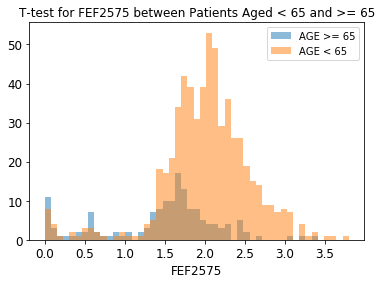

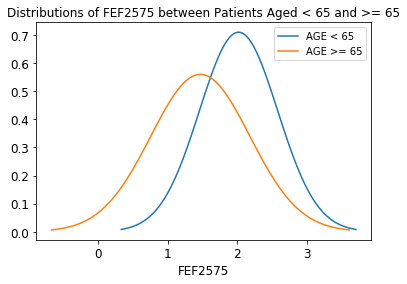

p-value for FEV1 = 2.7718653572184592e-06
FEV1 is significantly different between Patients Aged < 65 and >= 65


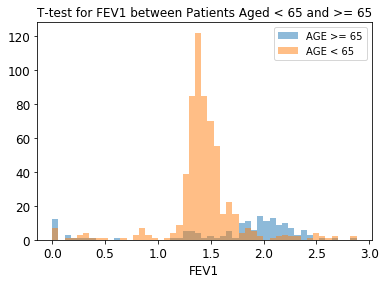

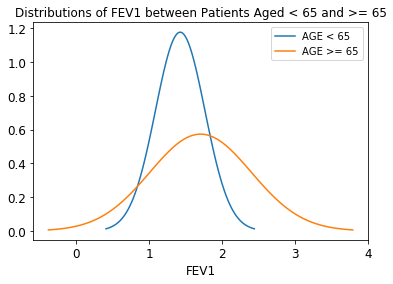

p-value for FEV1_FVC = 1.0407113206836113e-35
FEV1_FVC is significantly different between Patients Aged < 65 and >= 65


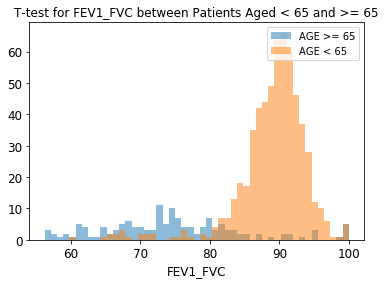

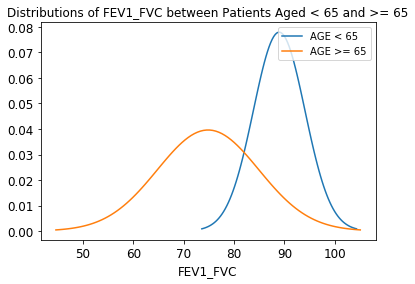

p-value for FEV6 = 1.0142242351454229e-13
FEV6 is significantly different between Patients Aged < 65 and >= 65


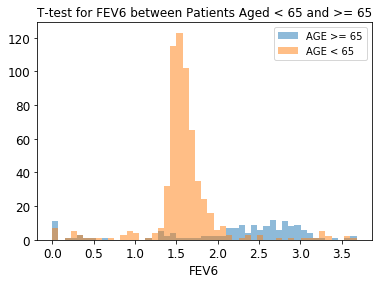

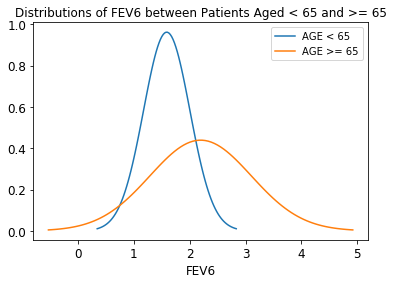

p-value for FVC = 1.1797603332039976e-18
FVC is significantly different between Patients Aged < 65 and >= 65


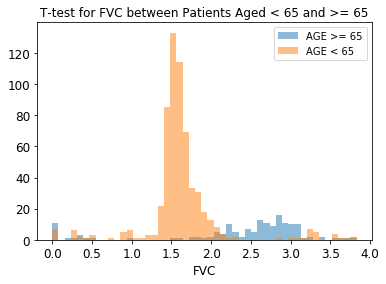

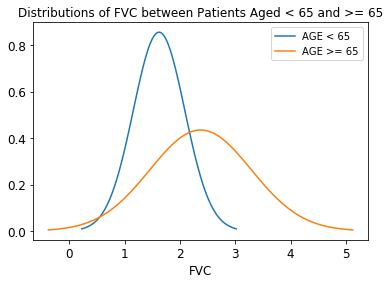

p-value for PEF = 1.0062283696451662e-20
PEF is significantly different between Patients Aged < 65 and >= 65


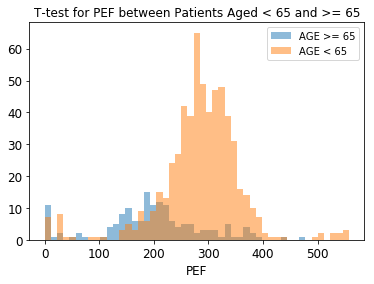

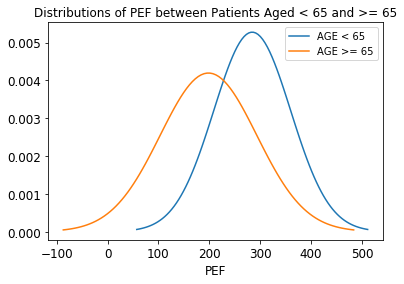

p-value for bpm_sys = 1.9084819597458553e-38
bpm_sys is significantly different between Patients Aged < 65 and >= 65


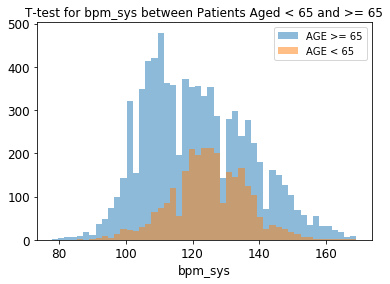

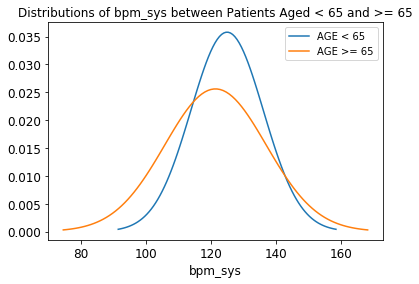

p-value for bpm_dia = 0.0
bpm_dia is significantly different between Patients Aged < 65 and >= 65


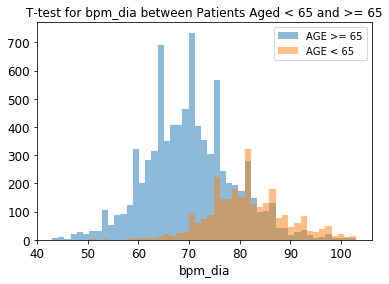

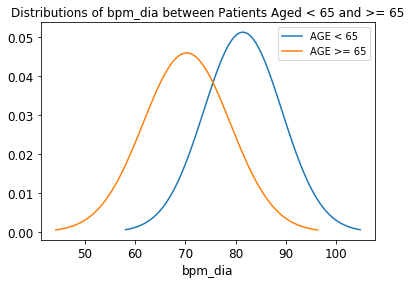

p-value for SpO2 = 0.0
SpO2 is significantly different between Patients Aged < 65 and >= 65


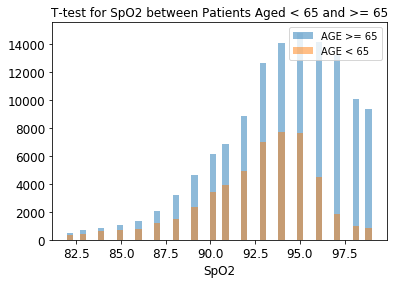

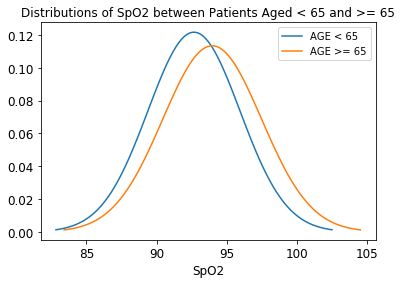

p-value for heartbeat = 1.0174592950556485e-35
heartbeat is significantly different between Patients Aged < 65 and >= 65


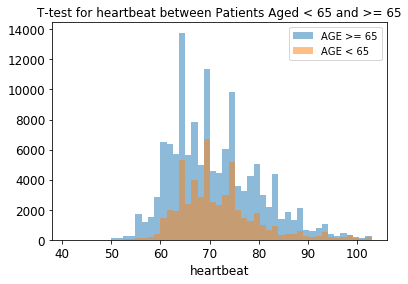

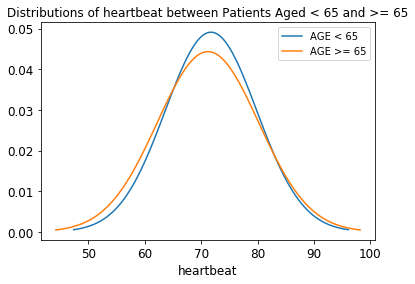

p-value for perfusionIndex = 0.0
perfusionIndex is significantly different between Patients Aged < 65 and >= 65


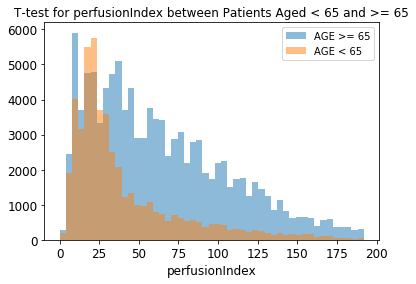

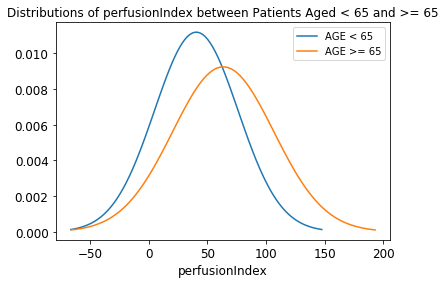

p-value for PPG_skew = 7.676253501010304e-50
PPG_skew is significantly different between Patients Aged < 65 and >= 65


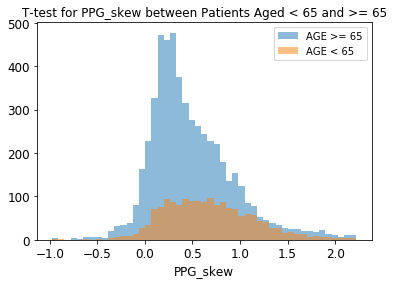

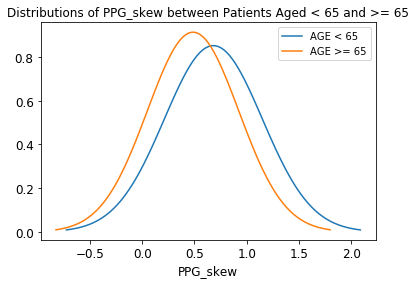

p-value for PPG_kurt = 8.840204601984984e-18
PPG_kurt is significantly different between Patients Aged < 65 and >= 65


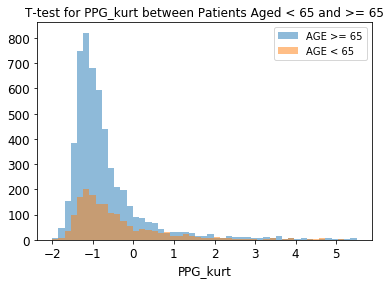

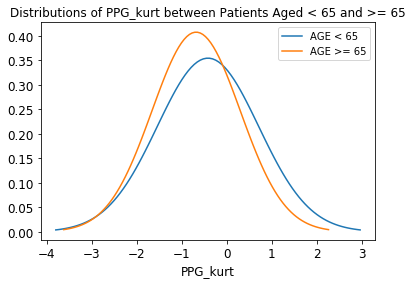

p-value for PPG_period = 0.09950856455428282
PPG_period is NOT significantly different between Patients Aged < 65 and >= 65


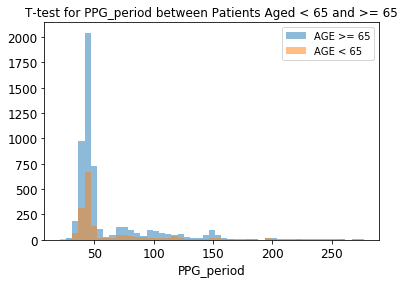

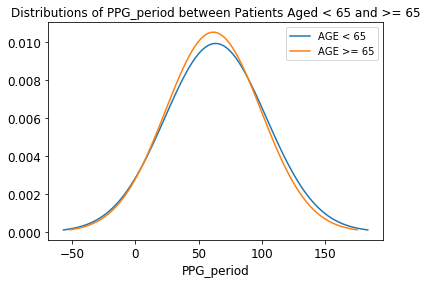

In [22]:
#Check if columns are different between pilots age >65 and pilots <=65 using Welch’s t-test
df2 = df[df['AGE'] <= 65].drop(columns=['TIME','PATIENT_CODE', 'DATE', 'CATEGORY', 'GENDER', 'AGE', 'PPG', 'PPG_united'])
df3 = df[df['AGE'] > 65].drop(columns=['TIME','PATIENT_CODE', 'DATE', 'CATEGORY', 'GENDER', 'AGE', 'PPG', 'PPG_united'])
for column in columns:
    if (len(df2[column].dropna()) !=0) & (len(df3[column].dropna()) !=0):
        stat, p = ttest_ind(df2[column].dropna(), df3[column].dropna(), equal_var=False)
        print 'p-value for', column, '=', p
        if p < 0.05:
            print column, 'is significantly different between Patients Aged < 65 and >= 65'
        else:
            print column, 'is NOT significantly different between Patients Aged < 65 and >= 65'
        bins = np.linspace(np.minimum(df2[column].min(), df3[column].min()), np.maximum(df2[column].max(), df3[column].max()), 50)
        #plt.hist(df2[column].dropna(), bins, alpha=0.5, label='AGE < 65')
        plt.hist(df3[column].dropna(), bins, alpha=0.5, label='AGE >= 65')
        plt.hist(df2[column].dropna(), bins, alpha=0.5, label='AGE < 65')
        plt.legend(loc='upper right', prop={'size': 10})
        plt.xlabel(column)
        plt.title('T-test for ' + column + ' between Patients Aged < 65 and >= 65', fontsize=12)
        plt.savefig('patients/ttest/' + column + 'age_65.svg', format='svg', dpi=600, bbox_inches = "tight")
        plt.show()
        mu1 = df2[column].dropna().mean()
        variance1 = df2[column].dropna().var()
        sigma1 = math.sqrt(variance1)
        x1 = np.linspace(mu1 - 3*sigma1, mu1 + 3*sigma1, 100)
        mu2 = df3[column].dropna().mean()
        variance2 = df3[column].dropna().var()
        sigma2 = math.sqrt(variance2)
        x2 = np.linspace(mu2 - 3*sigma2, mu2 + 3*sigma2, 100)
        plt.plot(x1,norm.pdf(x1, mu1, sigma1), label='AGE < 65')
        plt.plot(x2,norm.pdf(x2, mu2, sigma2), label='AGE >= 65')
        plt.legend(loc='upper right', prop={'size': 10})
        plt.xlabel(column)
        plt.title('Distributions of ' + column + ' between Patients Aged < 65 and >= 65', fontsize=12)
        plt.savefig('patients/ttest/' + column + 'age_652.svg', format='svg', dpi=600, bbox_inches = "tight")
        plt.show()
    else:
        print 'cannot calculate', column, 'because of nan values'

In [7]:
#Merge pilot Larisa and Pilot Larisa - Inactive
dfcat = pd.DataFrame.copy(df)
dfcat['CATEGORY'] = np.where(dfcat['CATEGORY'] == 'Pilot Larisa - Inactive', 'Pilot Larisa', dfcat['CATEGORY'])


p-value for FEF2575 = 1.6844303282676813e-19
FEF2575 is significantly different between Pilots Larisa and Pilot Crete


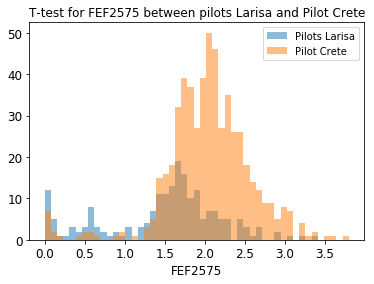

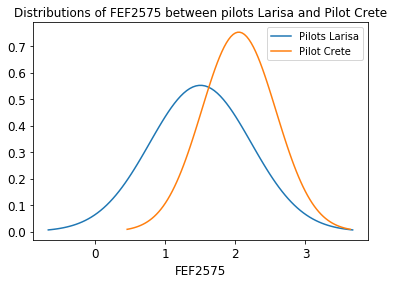

p-value for FEV1 = 2.5464961285069073e-06
FEV1 is significantly different between Pilots Larisa and Pilot Crete


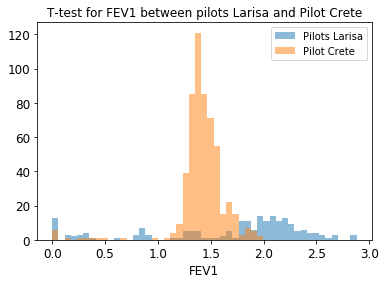

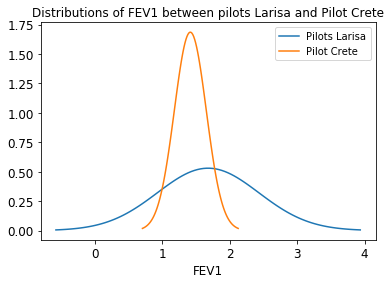

p-value for FEV1_FVC = 4.233227214684247e-45
FEV1_FVC is significantly different between Pilots Larisa and Pilot Crete


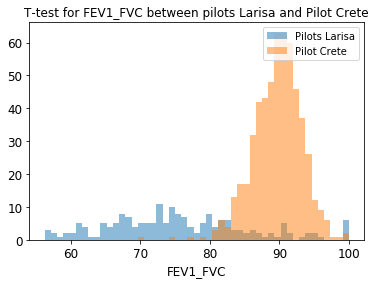

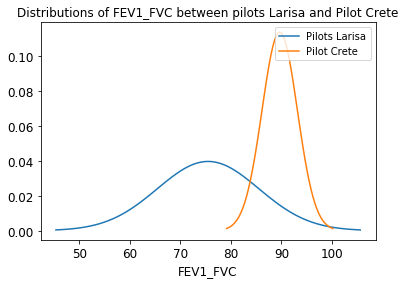

p-value for FEV6 = 4.3172879196614657e-13
FEV6 is significantly different between Pilots Larisa and Pilot Crete


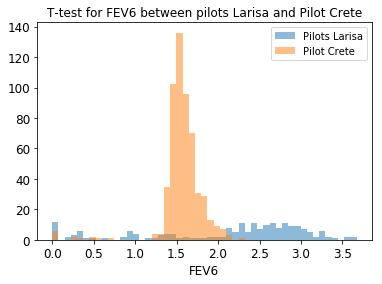

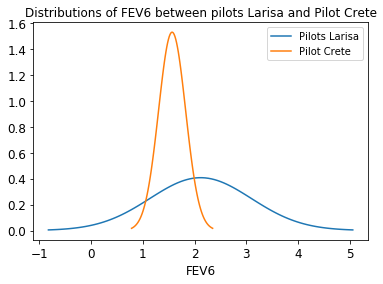

p-value for FVC = 1.580515511993669e-18
FVC is significantly different between Pilots Larisa and Pilot Crete


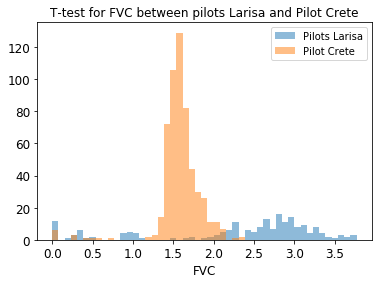

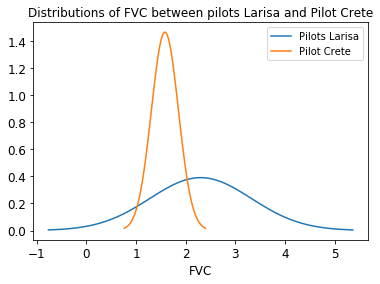

p-value for PEF = 1.0620259942348927e-21
PEF is significantly different between Pilots Larisa and Pilot Crete


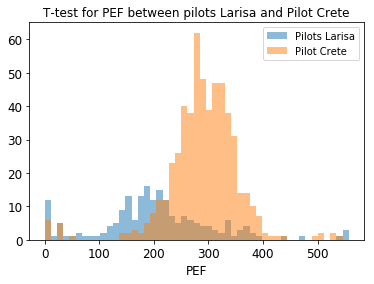

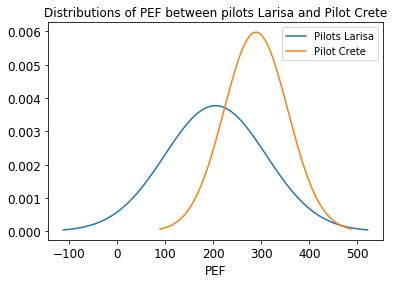

p-value for bpm_sys = 1.754517596512721e-305
bpm_sys is significantly different between Pilots Larisa and Pilot Crete


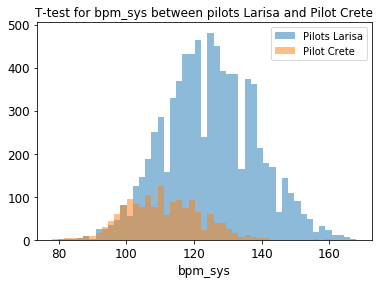

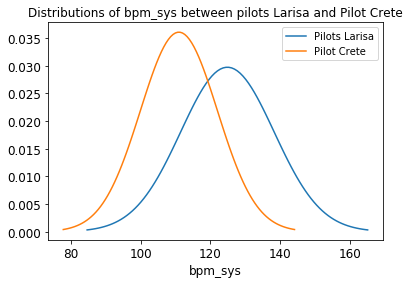

p-value for bpm_dia = 8.478562008050792e-26
bpm_dia is significantly different between Pilots Larisa and Pilot Crete


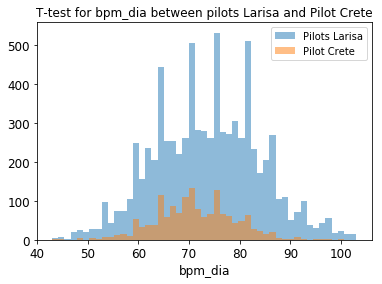

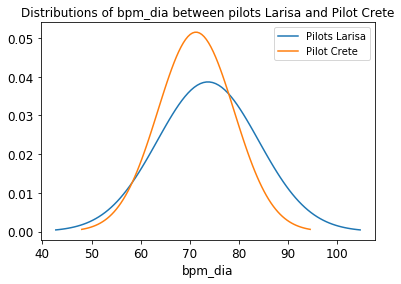

p-value for SpO2 = 0.0
SpO2 is significantly different between Pilots Larisa and Pilot Crete


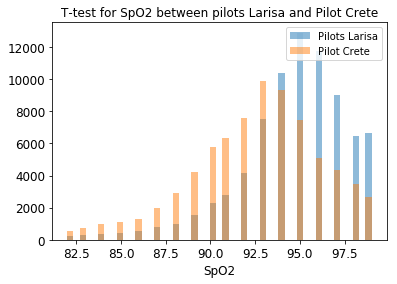

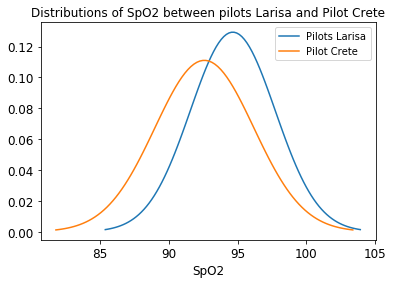

p-value for heartbeat = 0.0
heartbeat is significantly different between Pilots Larisa and Pilot Crete


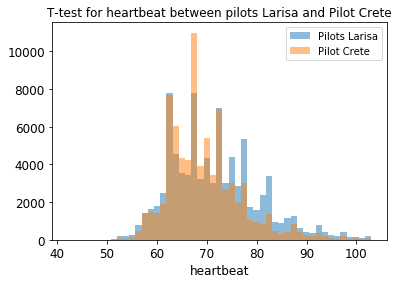

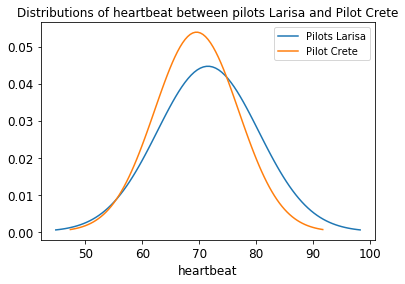

p-value for perfusionIndex = 0.0
perfusionIndex is significantly different between Pilots Larisa and Pilot Crete


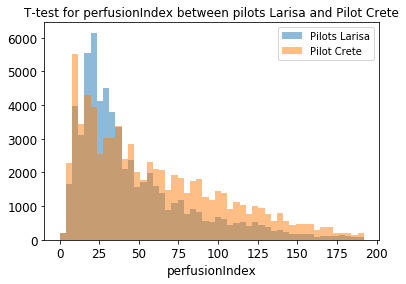

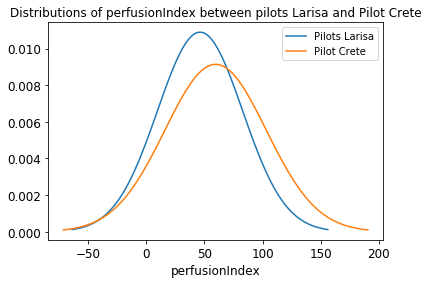

p-value for PPG_skew = 8.725515728013586e-14
PPG_skew is significantly different between Pilots Larisa and Pilot Crete


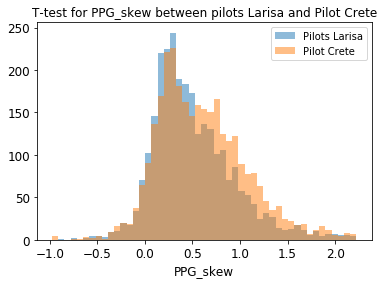

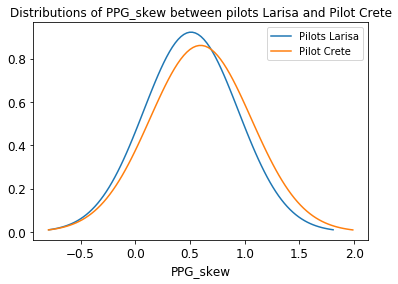

p-value for PPG_kurt = 3.6546421148809305e-13
PPG_kurt is significantly different between Pilots Larisa and Pilot Crete


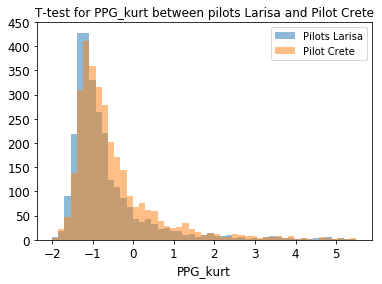

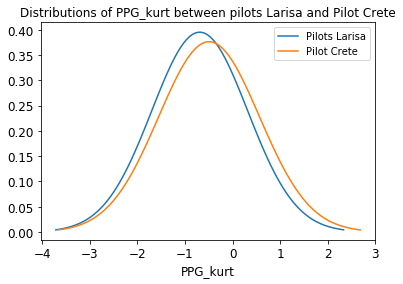

p-value for PPG_period = 6.048502900347286e-19
PPG_period is significantly different between Pilots Larisa and Pilot Crete


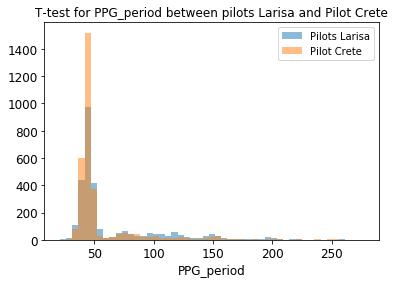

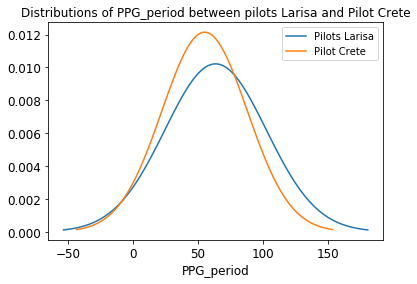

cannot calculate FEF2575 because of nan values
cannot calculate FEV1 because of nan values
p-value for FEV1_FVC = 3.537026412563709e-07
FEV1_FVC is significantly different between Pilots Larisa and Pilot Athens


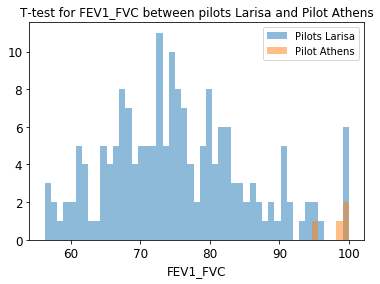

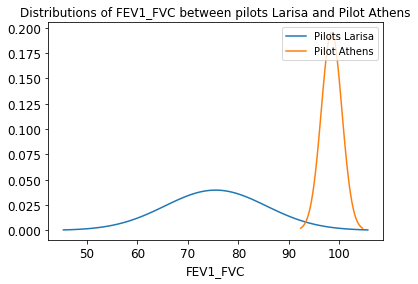

p-value for FEV6 = 8.468378634680358e-10
FEV6 is significantly different between Pilots Larisa and Pilot Athens


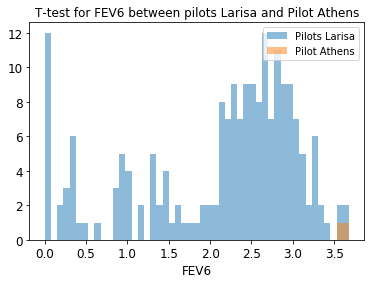

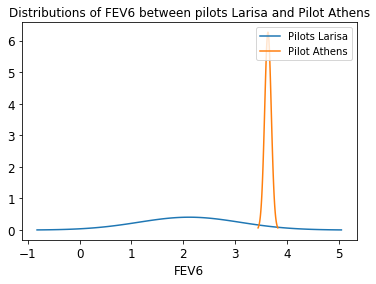

p-value for FVC = 3.3675018610596163e-07
FVC is significantly different between Pilots Larisa and Pilot Athens


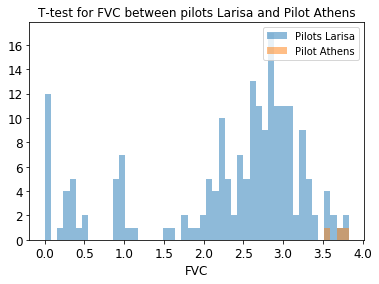

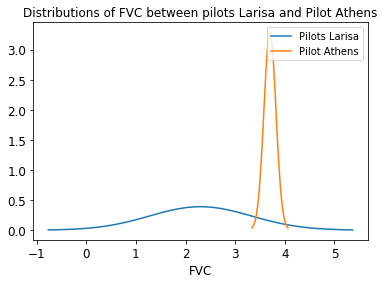

cannot calculate PEF because of nan values
p-value for bpm_sys = 2.5202385291455884e-28
bpm_sys is significantly different between Pilots Larisa and Pilot Athens


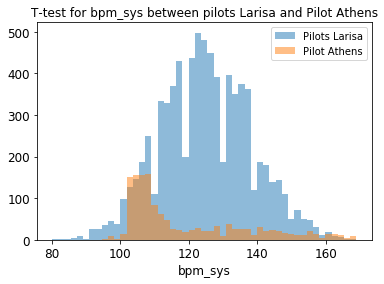

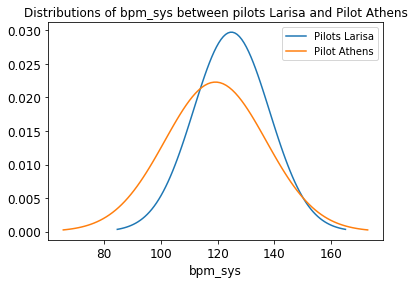

p-value for bpm_dia = 3.779956515602456e-11
bpm_dia is significantly different between Pilots Larisa and Pilot Athens


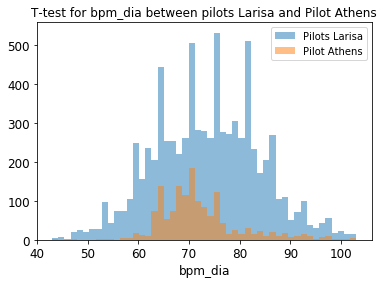

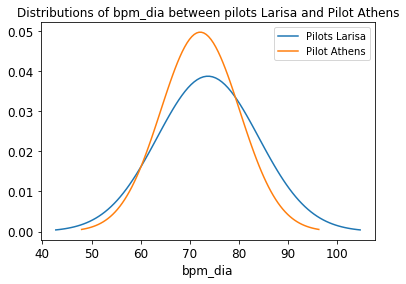

p-value for SpO2 = 0.0
SpO2 is significantly different between Pilots Larisa and Pilot Athens


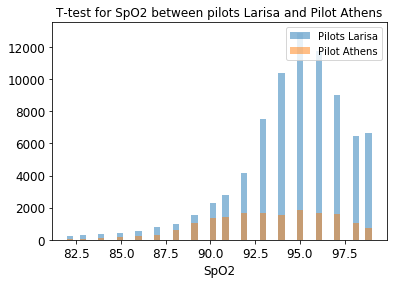

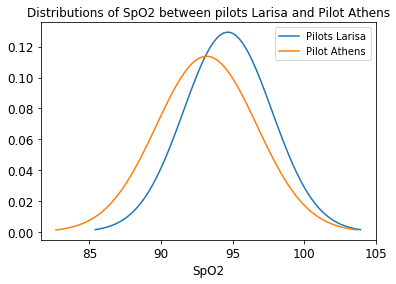

p-value for heartbeat = 0.0
heartbeat is significantly different between Pilots Larisa and Pilot Athens


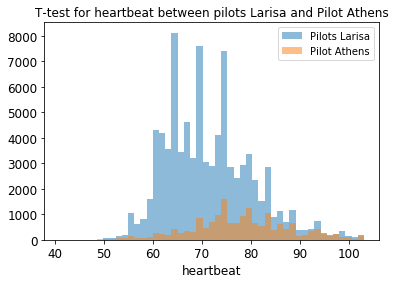

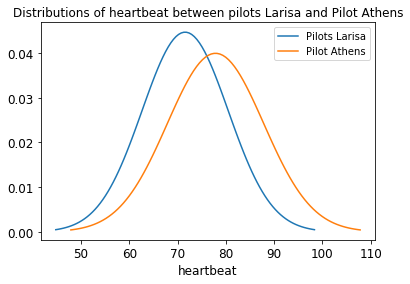

p-value for perfusionIndex = 0.0
perfusionIndex is significantly different between Pilots Larisa and Pilot Athens


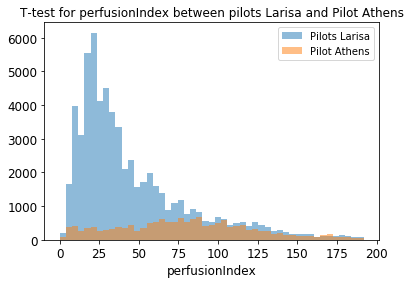

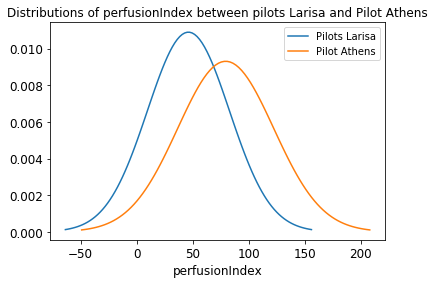

p-value for PPG_skew = 1.660263032146227e-22
PPG_skew is significantly different between Pilots Larisa and Pilot Athens


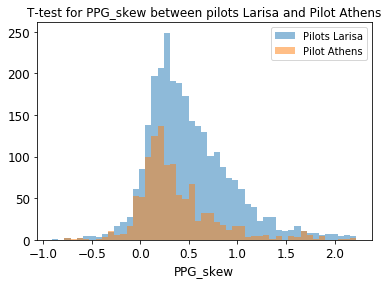

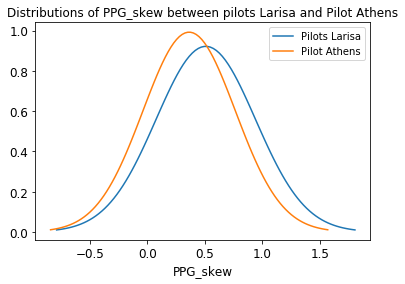

p-value for PPG_kurt = 2.3190166828905727e-07
PPG_kurt is significantly different between Pilots Larisa and Pilot Athens


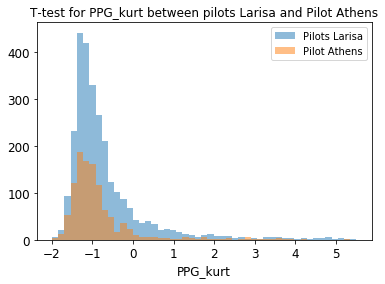

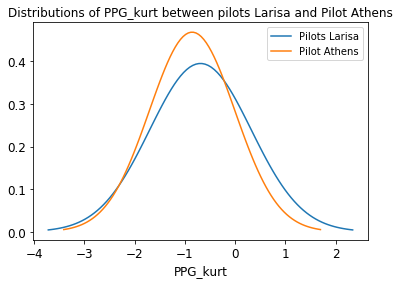

p-value for PPG_period = 1.0628871190736368e-15
PPG_period is significantly different between Pilots Larisa and Pilot Athens


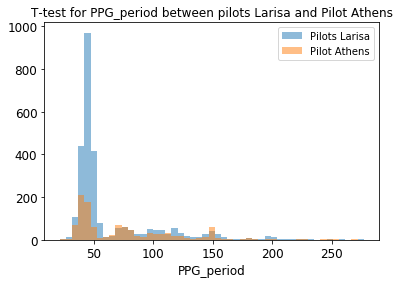

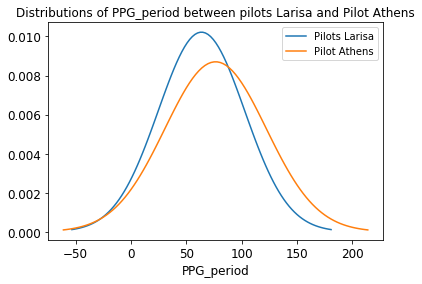

cannot calculate FEF2575 because of nan values
cannot calculate FEV1 because of nan values
cannot calculate FEV1_FVC because of nan values
cannot calculate FEV6 because of nan values
cannot calculate FVC because of nan values
cannot calculate PEF because of nan values
p-value for bpm_sys = 9.448415897353405e-06
bpm_sys is significantly different between Pilots Larisa and Pilot Thessaloniki


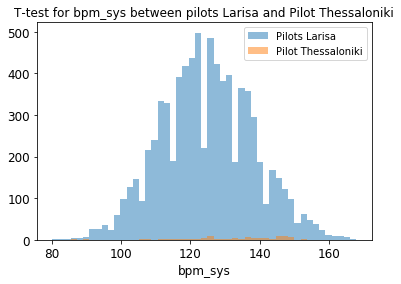

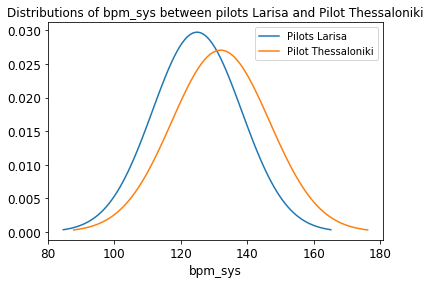

p-value for bpm_dia = 8.584174180447083e-15
bpm_dia is significantly different between Pilots Larisa and Pilot Thessaloniki


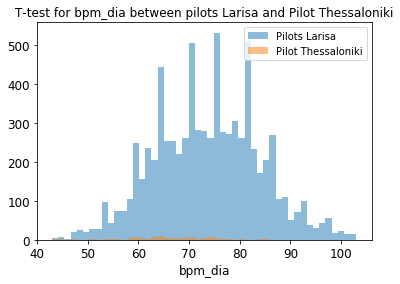

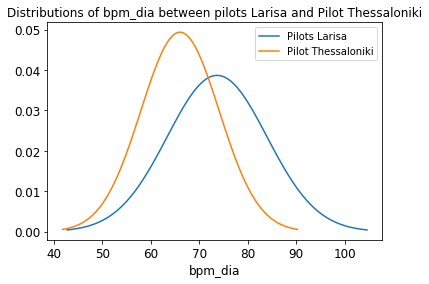

p-value for SpO2 = 6.450417740886287e-193
SpO2 is significantly different between Pilots Larisa and Pilot Thessaloniki


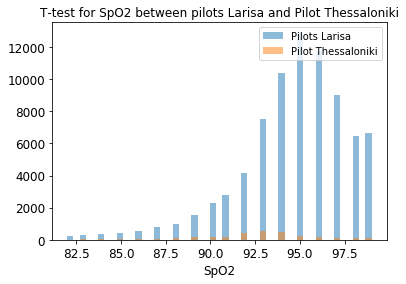

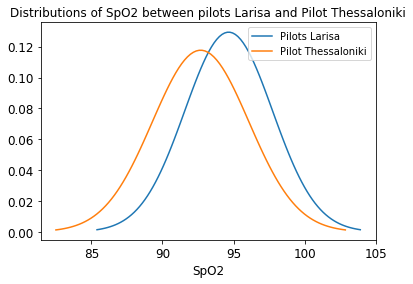

p-value for heartbeat = 2.8910335893278923e-121
heartbeat is significantly different between Pilots Larisa and Pilot Thessaloniki


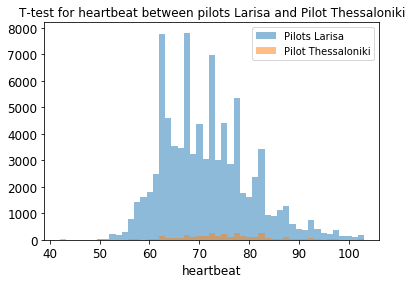

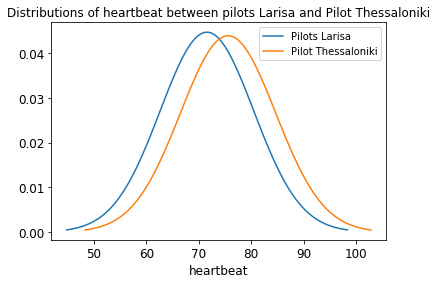

p-value for perfusionIndex = 1.8954042241612164e-190
perfusionIndex is significantly different between Pilots Larisa and Pilot Thessaloniki


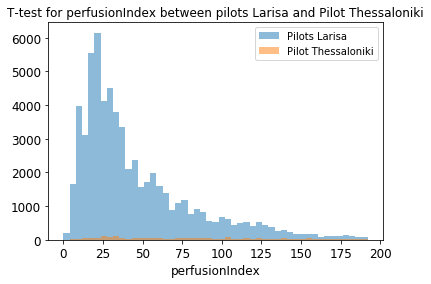

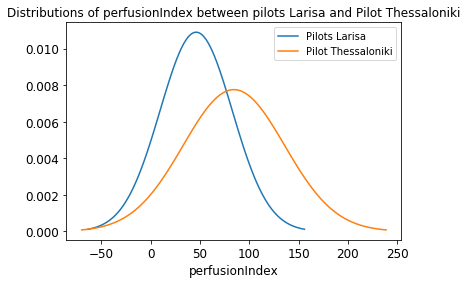

p-value for PPG_skew = 1.2054145708708639e-14
PPG_skew is significantly different between Pilots Larisa and Pilot Thessaloniki


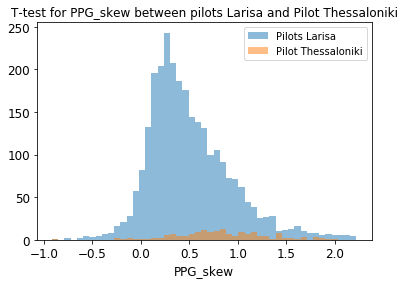

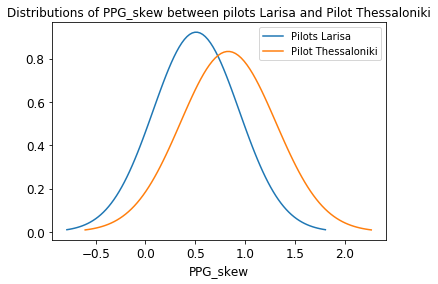

p-value for PPG_kurt = 7.701329798596641e-07
PPG_kurt is significantly different between Pilots Larisa and Pilot Thessaloniki


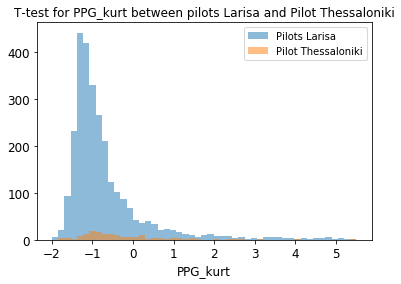

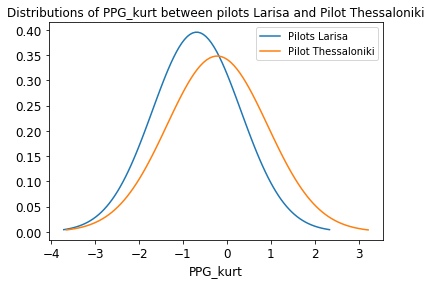

p-value for PPG_period = 0.006123647613202702
PPG_period is significantly different between Pilots Larisa and Pilot Thessaloniki


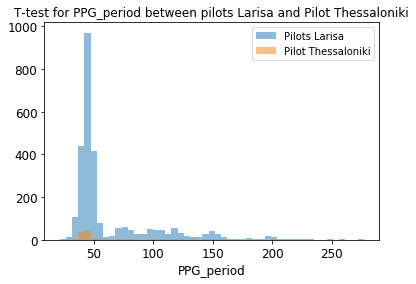

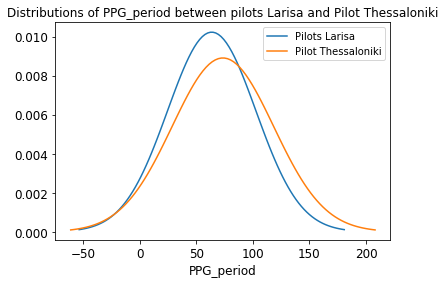

In [8]:
#Check if columns are different between pilots Larisa and the other pilot categories using Welch’s t-test
categories = list(['Pilot Crete', 'Pilot Athens', 'Pilot Thessaloniki'])
for category in categories:
    df2 = dfcat[dfcat['CATEGORY'].isin(['Pilot Larisa'])].drop(columns=['TIME','PATIENT_CODE', 'DATE', 'CATEGORY', 'GENDER', 'AGE', 'PPG', 'PPG_united'])
    df3 = dfcat[dfcat['CATEGORY'].isin([category])].drop(columns=['TIME','PATIENT_CODE', 'DATE', 'CATEGORY', 'GENDER', 'AGE', 'PPG', 'PPG_united'])
    for column in columns:
        if (len(df2[column].dropna()) !=0) & (len(df3[column].dropna()) !=0):
            stat, p = ttest_ind(df2[column].dropna(), df3[column].dropna(), equal_var=False)
            print 'p-value for', column, '=', p
            if p < 0.05:
                print column, 'is significantly different between Pilots Larisa and', category
            else:
                print column, 'is NOT significantly different between Pilots Larisa and', category
            bins = np.linspace(np.minimum(df2[column].min(), df3[column].min()), np.maximum(df2[column].max(), df3[column].max()), 50)
            plt.hist(df2[column].dropna(), bins, alpha=0.5, label='Pilots Larisa')
            plt.hist(df3[column].dropna(), bins, alpha=0.5, label=category)
            plt.legend(loc='upper right', prop={'size': 10})
            plt.xlabel(column)
            plt.title('T-test for ' + column + ' between pilots Larisa and ' + category, fontsize=12)
            plt.savefig('patients/ttest/' + column + 'pilots_Larisa_and' + category + '.svg', format='svg', dpi=600, bbox_inches = "tight")
            plt.show()
            mu1 = df2[column].dropna().mean()
            variance1 = df2[column].dropna().var()
            sigma1 = math.sqrt(variance1)
            x1 = np.linspace(mu1 - 3*sigma1, mu1 + 3*sigma1, 100)
            mu2 = df3[column].dropna().mean()
            variance2 = df3[column].dropna().var()
            sigma2 = math.sqrt(variance2)
            x2 = np.linspace(mu2 - 3*sigma2, mu2 + 3*sigma2, 100)
            plt.plot(x1,norm.pdf(x1, mu1, sigma1), label='Pilots Larisa')
            plt.plot(x2,norm.pdf(x2, mu2, sigma2), label=category)
            plt.legend(loc='upper right', prop={'size': 10})
            plt.xlabel(column)
            plt.title('Distributions of ' + column + ' between pilots Larisa and ' + category, fontsize=12)
            plt.savefig('patients/ttest/' + column + 'pilots_Larisa_and' + category + '2.svg', format='svg', dpi=600, bbox_inches = "tight")
            plt.show()
        else:
            print 'cannot calculate', column, 'because of nan values'

p-value for FEF2575 = 1.6844303282676813e-19
FEF2575 is significantly different between Pilots Crete and Pilot Larisa


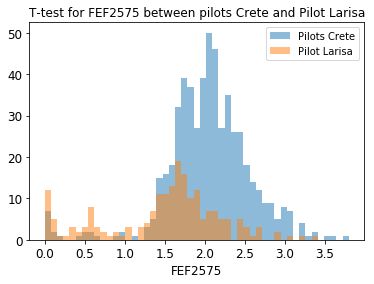

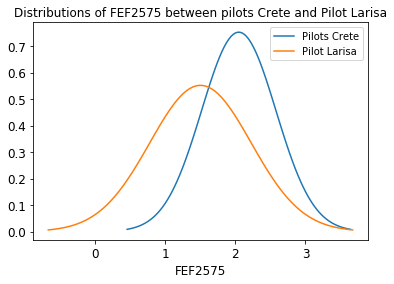

p-value for FEV1 = 2.5464961285069073e-06
FEV1 is significantly different between Pilots Crete and Pilot Larisa


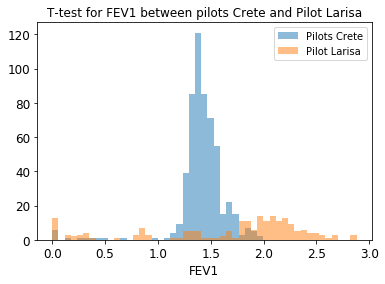

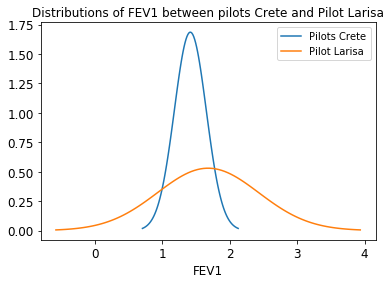

p-value for FEV1_FVC = 4.233227214684247e-45
FEV1_FVC is significantly different between Pilots Crete and Pilot Larisa


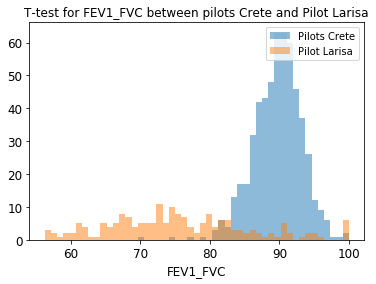

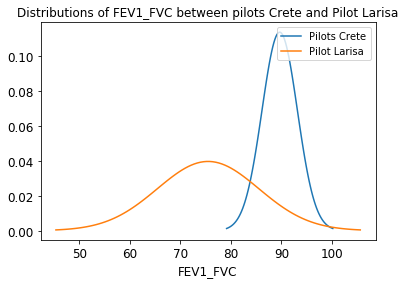

p-value for FEV6 = 4.3172879196614657e-13
FEV6 is significantly different between Pilots Crete and Pilot Larisa


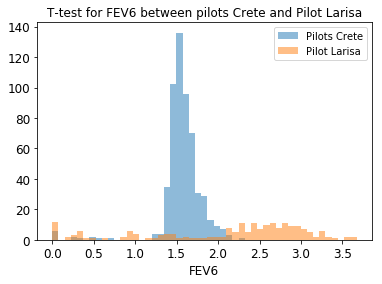

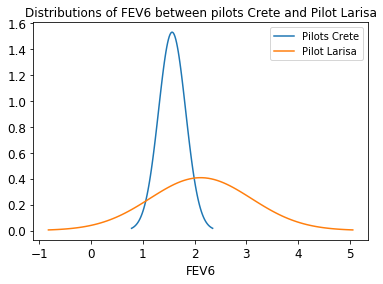

p-value for FVC = 1.580515511993669e-18
FVC is significantly different between Pilots Crete and Pilot Larisa


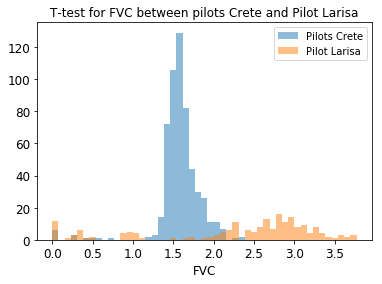

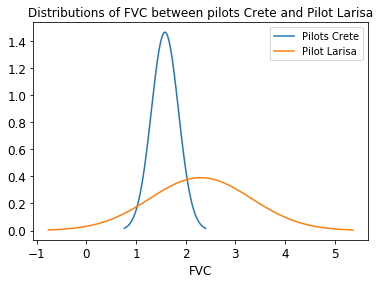

p-value for PEF = 1.0620259942348927e-21
PEF is significantly different between Pilots Crete and Pilot Larisa


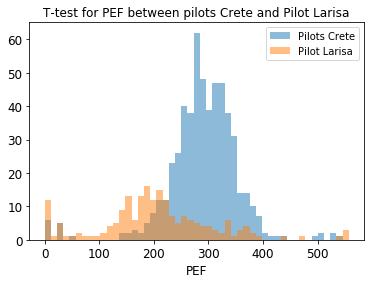

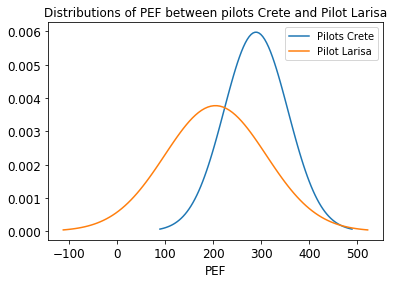

p-value for bpm_sys = 1.754517596512721e-305
bpm_sys is significantly different between Pilots Crete and Pilot Larisa


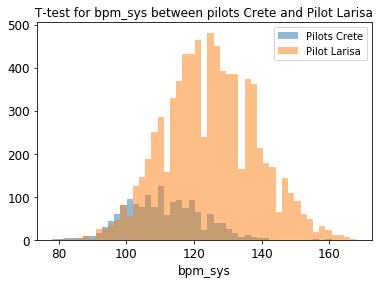

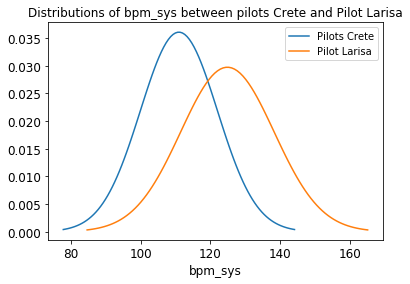

p-value for bpm_dia = 8.478562008050792e-26
bpm_dia is significantly different between Pilots Crete and Pilot Larisa


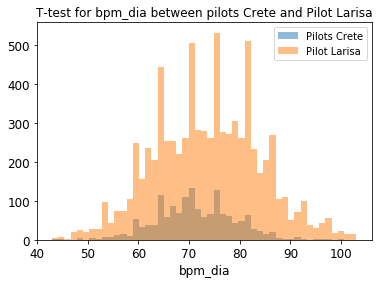

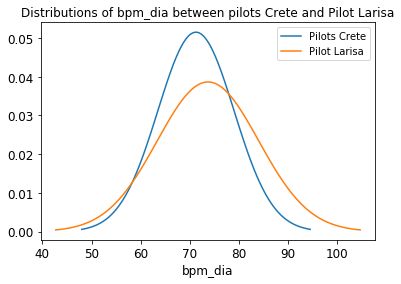

p-value for SpO2 = 0.0
SpO2 is significantly different between Pilots Crete and Pilot Larisa


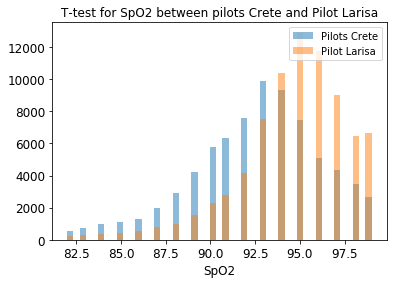

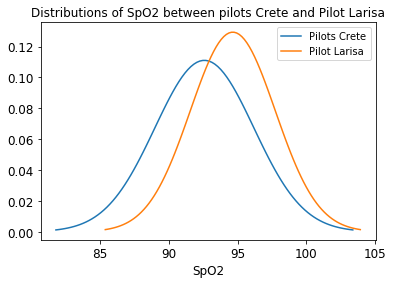

p-value for heartbeat = 0.0
heartbeat is significantly different between Pilots Crete and Pilot Larisa


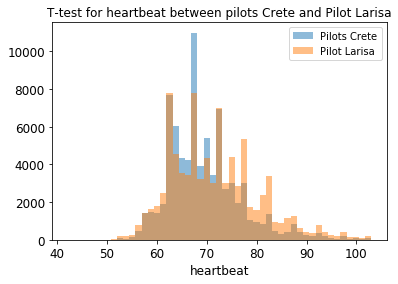

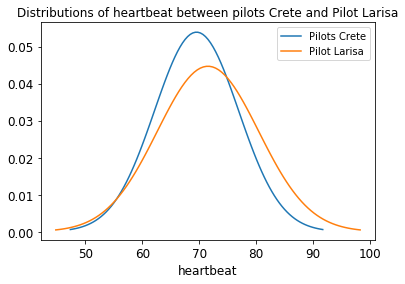

p-value for perfusionIndex = 0.0
perfusionIndex is significantly different between Pilots Crete and Pilot Larisa


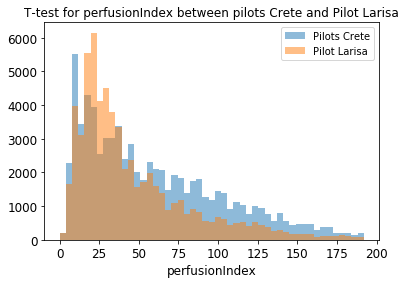

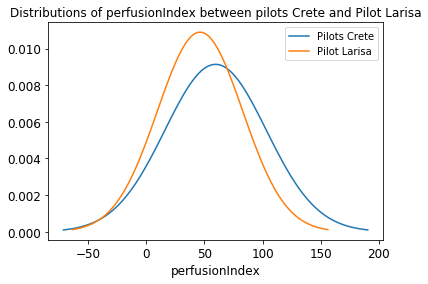

p-value for PPG_skew = 8.725515728013586e-14
PPG_skew is significantly different between Pilots Crete and Pilot Larisa


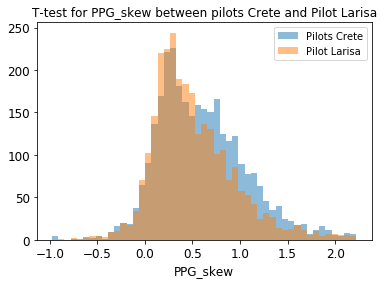

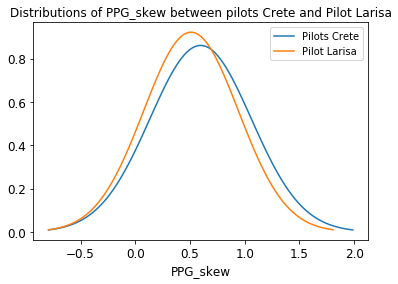

p-value for PPG_kurt = 3.6546421148809305e-13
PPG_kurt is significantly different between Pilots Crete and Pilot Larisa


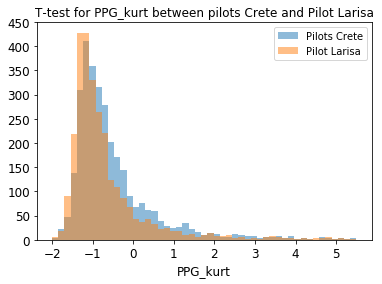

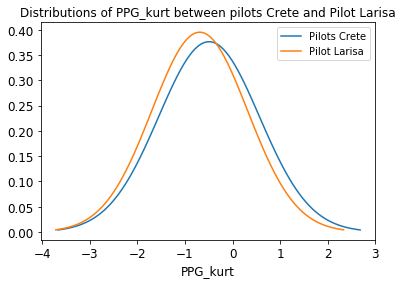

p-value for PPG_period = 6.048502900347286e-19
PPG_period is significantly different between Pilots Crete and Pilot Larisa


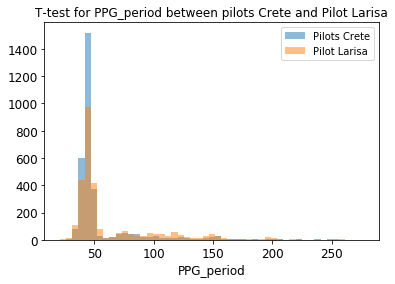

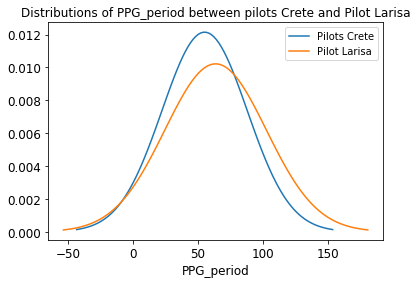

cannot calculate FEF2575 because of nan values
cannot calculate FEV1 because of nan values
p-value for FEV1_FVC = 0.002878457962071965
FEV1_FVC is significantly different between Pilots Crete and Pilot Athens


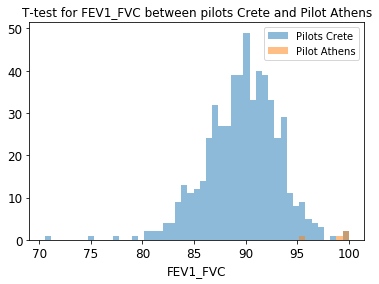

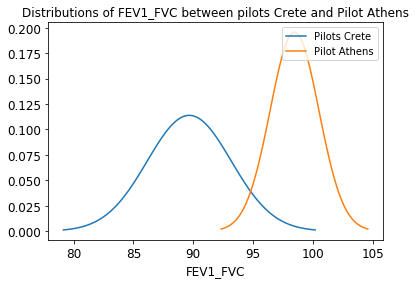

p-value for FEV6 = 0.009117923113509365
FEV6 is significantly different between Pilots Crete and Pilot Athens


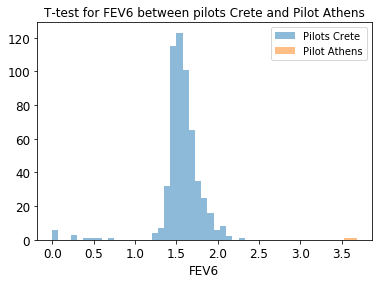

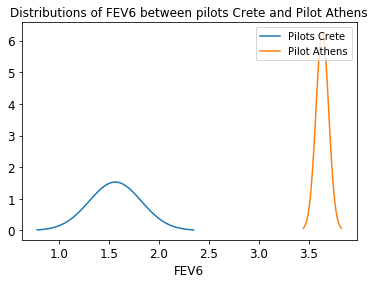

p-value for FVC = 0.0008269880064045446
FVC is significantly different between Pilots Crete and Pilot Athens


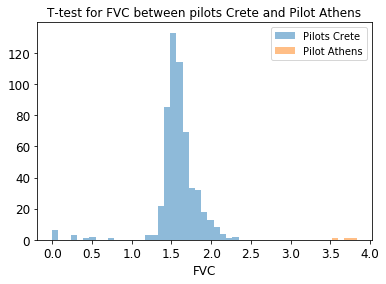

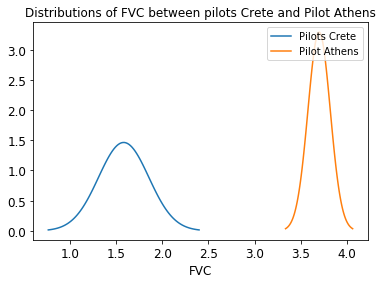

cannot calculate PEF because of nan values
p-value for bpm_sys = 1.497899084498085e-48
bpm_sys is significantly different between Pilots Crete and Pilot Athens


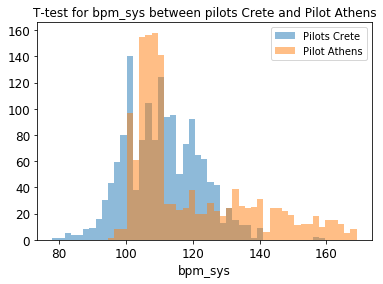

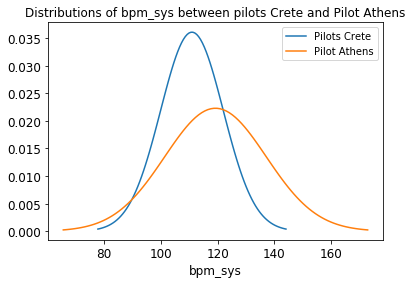

p-value for bpm_dia = 0.0026874082963680604
bpm_dia is significantly different between Pilots Crete and Pilot Athens


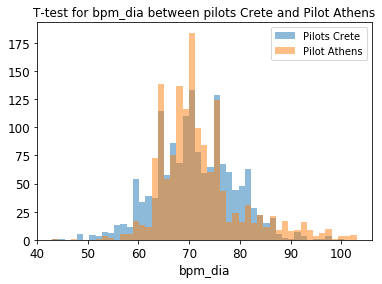

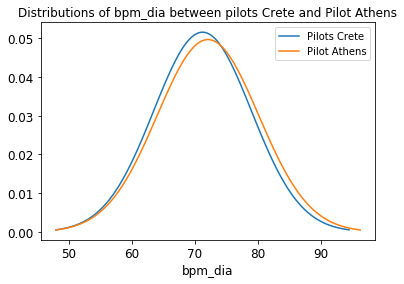

p-value for SpO2 = 5.464894240433731e-87
SpO2 is significantly different between Pilots Crete and Pilot Athens


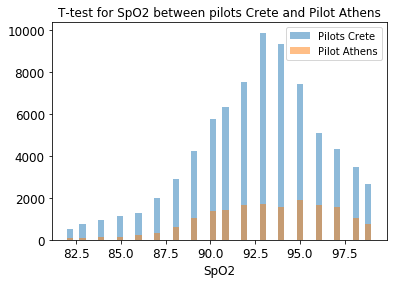

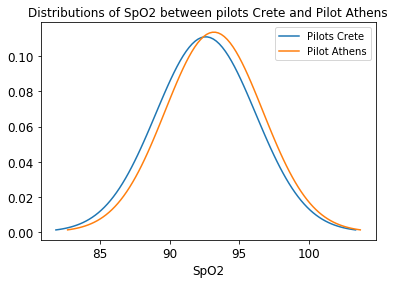

p-value for heartbeat = 0.0
heartbeat is significantly different between Pilots Crete and Pilot Athens


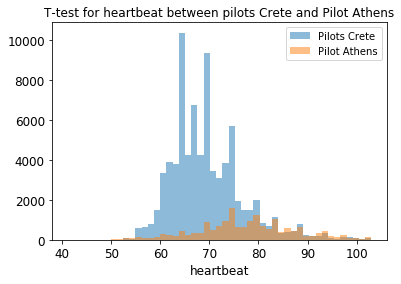

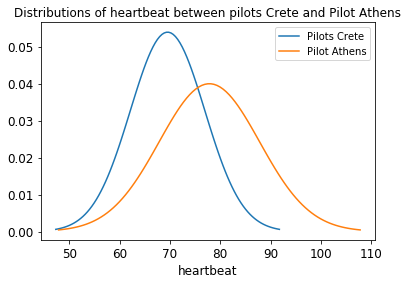

p-value for perfusionIndex = 0.0
perfusionIndex is significantly different between Pilots Crete and Pilot Athens


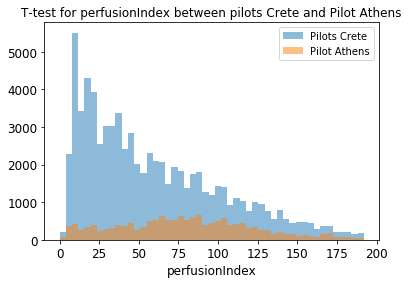

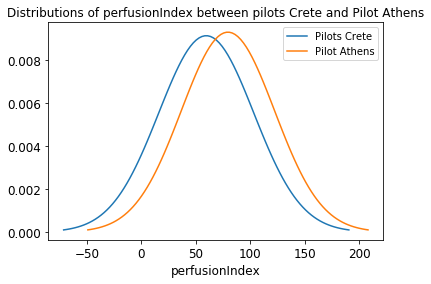

p-value for PPG_skew = 3.52043196231099e-53
PPG_skew is significantly different between Pilots Crete and Pilot Athens


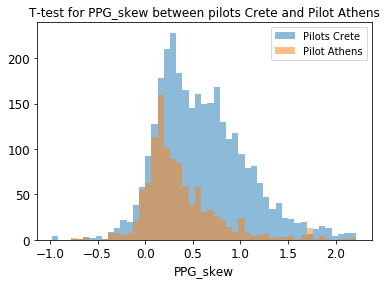

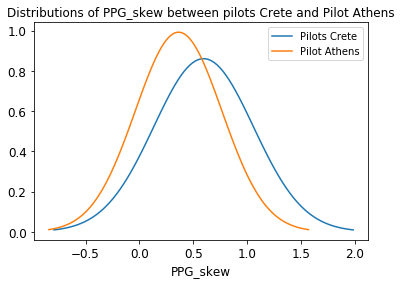

p-value for PPG_kurt = 3.856766184690744e-29
PPG_kurt is significantly different between Pilots Crete and Pilot Athens


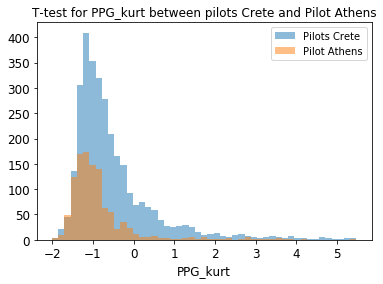

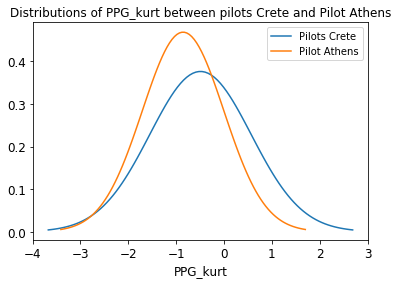

p-value for PPG_period = 3.7392862699165085e-42
PPG_period is significantly different between Pilots Crete and Pilot Athens


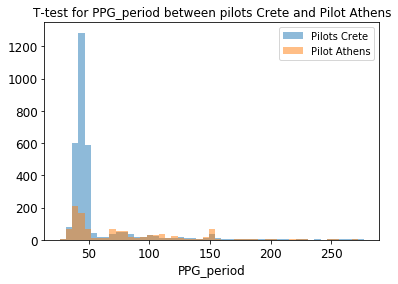

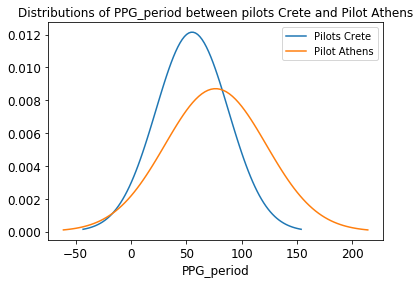

cannot calculate FEF2575 because of nan values
cannot calculate FEV1 because of nan values
cannot calculate FEV1_FVC because of nan values
cannot calculate FEV6 because of nan values
cannot calculate FVC because of nan values
cannot calculate PEF because of nan values
p-value for bpm_sys = 1.1370181513810567e-24
bpm_sys is significantly different between Pilots Crete and Pilot Thessaloniki


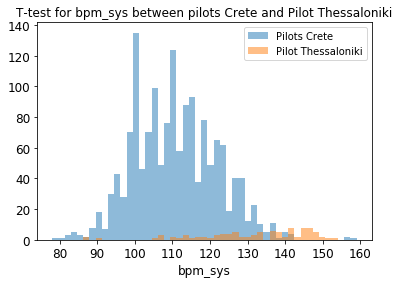

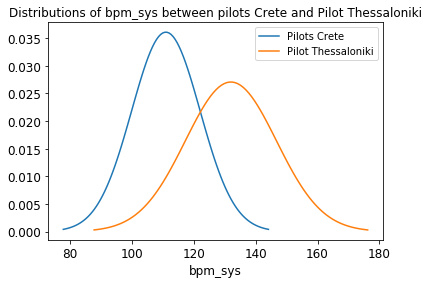

p-value for bpm_dia = 1.6280540756309615e-08
bpm_dia is significantly different between Pilots Crete and Pilot Thessaloniki


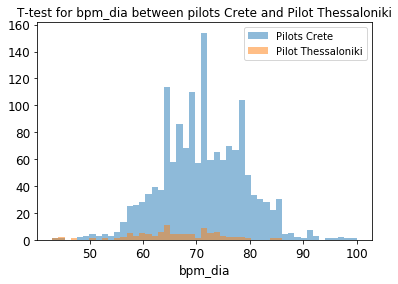

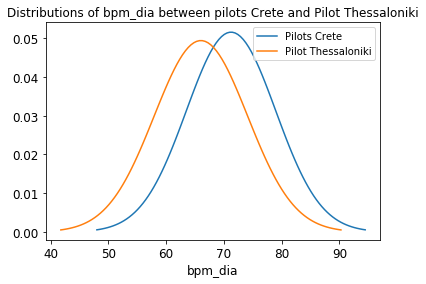

p-value for SpO2 = 0.13514450783972579
SpO2 is NOT significantly different between Pilots Crete and Pilot Thessaloniki


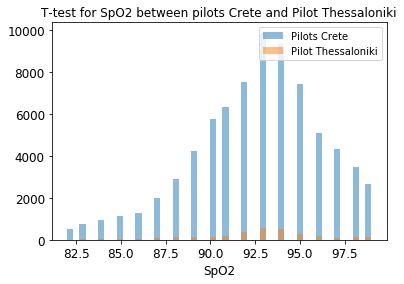

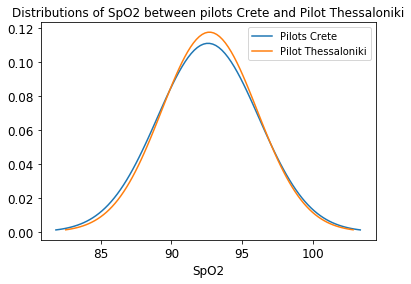

p-value for heartbeat = 7.098112147535241e-248
heartbeat is significantly different between Pilots Crete and Pilot Thessaloniki


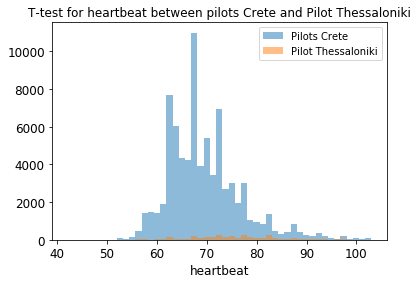

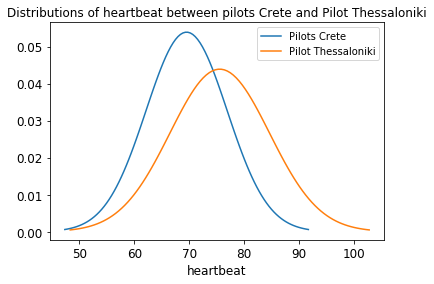

p-value for perfusionIndex = 2.5200102780051323e-91
perfusionIndex is significantly different between Pilots Crete and Pilot Thessaloniki


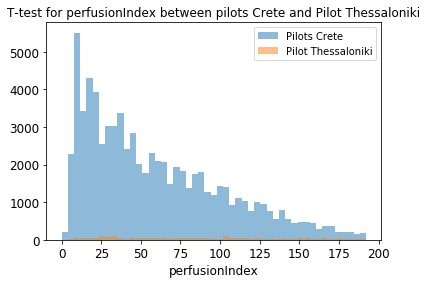

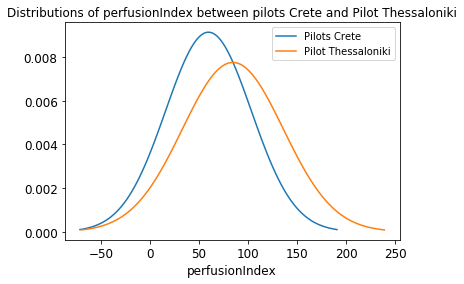

p-value for PPG_skew = 5.56023573127992e-09
PPG_skew is significantly different between Pilots Crete and Pilot Thessaloniki


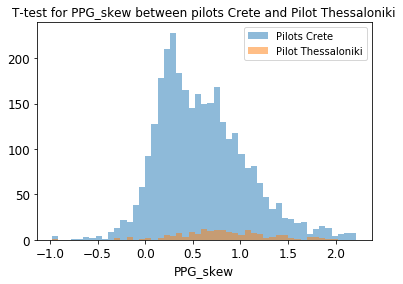

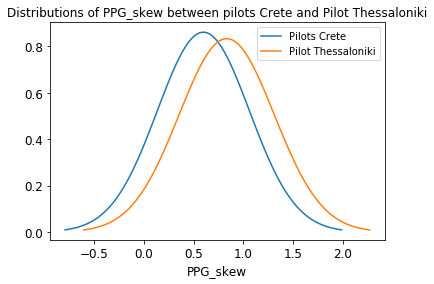

p-value for PPG_kurt = 0.0033487852970139507
PPG_kurt is significantly different between Pilots Crete and Pilot Thessaloniki


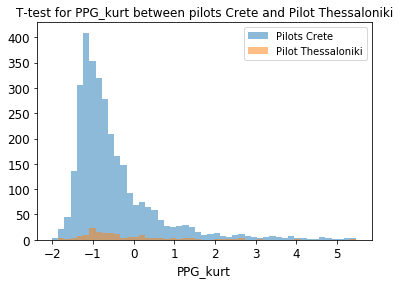

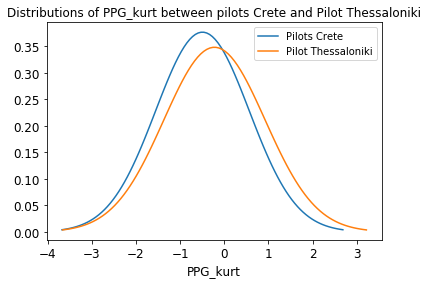

p-value for PPG_period = 5.730370873961251e-07
PPG_period is significantly different between Pilots Crete and Pilot Thessaloniki


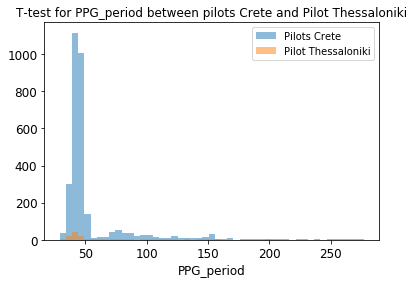

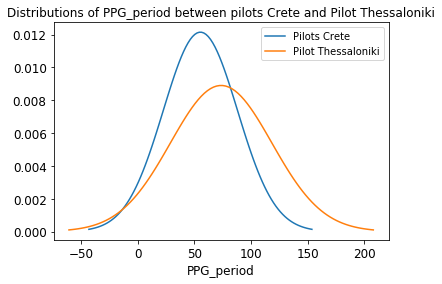

In [9]:
#Check if columns are different between pilots Crete and the other pilot categories using Welch’s t-test
categories = list(['Pilot Larisa', 'Pilot Athens', 'Pilot Thessaloniki'])
for category in categories:
    df2 = dfcat[dfcat['CATEGORY'].isin(['Pilot Crete'])].drop(columns=['TIME','PATIENT_CODE', 'DATE', 'CATEGORY', 'GENDER', 'AGE', 'PPG', 'PPG_united'])
    df3 = dfcat[dfcat['CATEGORY'].isin([category])].drop(columns=['TIME','PATIENT_CODE', 'DATE', 'CATEGORY', 'GENDER', 'AGE', 'PPG', 'PPG_united'])
    for column in columns:
        if (len(df2[column].dropna()) !=0) & (len(df3[column].dropna()) !=0):
            stat, p = ttest_ind(df2[column].dropna(), df3[column].dropna(), equal_var=False)
            print 'p-value for', column, '=', p
            if p < 0.05:
                print column, 'is significantly different between Pilots Crete and', category
            else:
                print column, 'is NOT significantly different between Pilots Crete and', category
            bins = np.linspace(np.minimum(df2[column].min(), df3[column].min()), np.maximum(df2[column].max(), df3[column].max()), 50)
            plt.hist(df2[column].dropna(), bins, alpha=0.5, label='Pilots Crete')
            plt.hist(df3[column].dropna(), bins, alpha=0.5, label=category)
            plt.legend(loc='upper right', prop={'size': 10})
            plt.xlabel(column)
            plt.title('T-test for ' + column + ' between pilots Crete and ' + category, fontsize=12)
            plt.savefig('patients/ttest/' + column + 'pilots_Crete_and' + category + '.svg', format='svg', dpi=600, bbox_inches = "tight")
            plt.show()
            mu1 = df2[column].dropna().mean()
            variance1 = df2[column].dropna().var()
            sigma1 = math.sqrt(variance1)
            x1 = np.linspace(mu1 - 3*sigma1, mu1 + 3*sigma1, 100)
            mu2 = df3[column].dropna().mean()
            variance2 = df3[column].dropna().var()
            sigma2 = math.sqrt(variance2)
            x2 = np.linspace(mu2 - 3*sigma2, mu2 + 3*sigma2, 100)
            plt.plot(x1,norm.pdf(x1, mu1, sigma1), label='Pilots Crete')
            plt.plot(x2,norm.pdf(x2, mu2, sigma2), label=category)
            plt.legend(loc='upper right', prop={'size': 10})
            plt.xlabel(column)
            plt.title('Distributions of ' + column + ' between pilots Crete and ' + category, fontsize=12)
            plt.savefig('patients/ttest/' + column + 'pilots_Crete_and' + category + '2.svg', format='svg', dpi=600, bbox_inches = "tight")
            plt.show()
        else:
            print 'cannot calculate', column, 'because of nan values'


cannot calculate FEF2575 because of nan values
cannot calculate FEV1 because of nan values
p-value for FEV1_FVC = 3.537026412563709e-07
FEV1_FVC is significantly different between Pilots Athens and Pilot Larisa


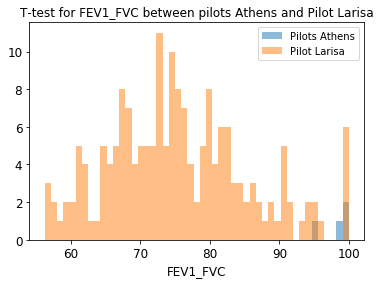

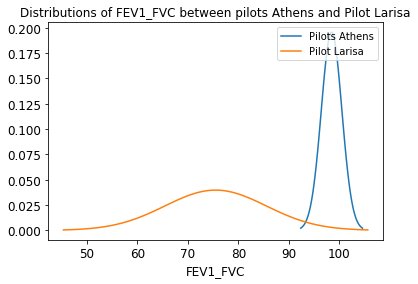

p-value for FEV6 = 8.468378634680358e-10
FEV6 is significantly different between Pilots Athens and Pilot Larisa


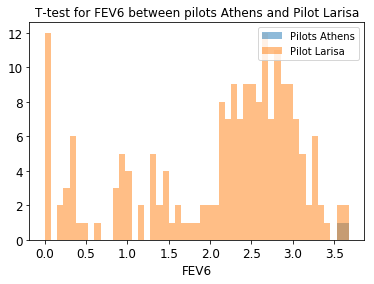

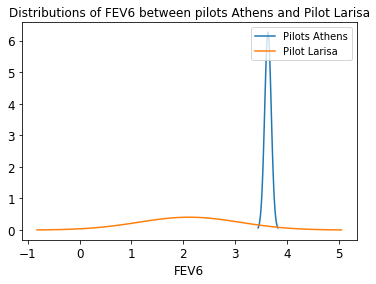

p-value for FVC = 3.3675018610596163e-07
FVC is significantly different between Pilots Athens and Pilot Larisa


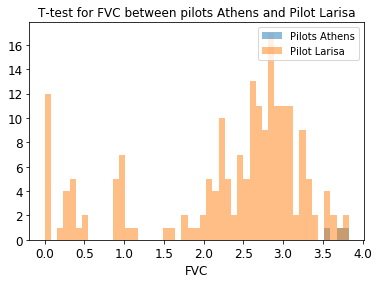

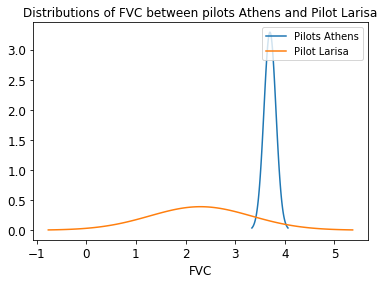

cannot calculate PEF because of nan values
p-value for bpm_sys = 2.5202385291455884e-28
bpm_sys is significantly different between Pilots Athens and Pilot Larisa


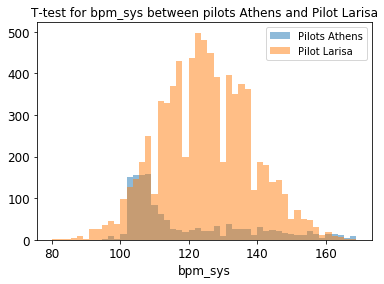

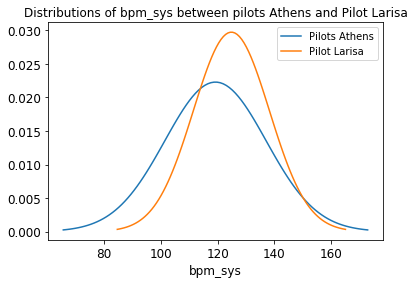

p-value for bpm_dia = 3.779956515602456e-11
bpm_dia is significantly different between Pilots Athens and Pilot Larisa


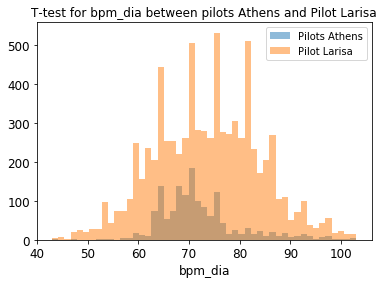

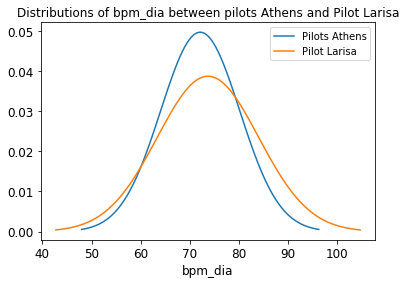

p-value for SpO2 = 0.0
SpO2 is significantly different between Pilots Athens and Pilot Larisa


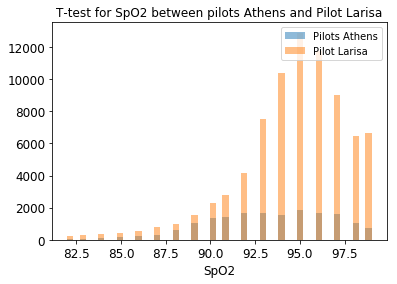

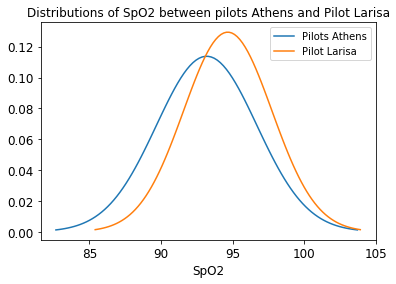

p-value for heartbeat = 0.0
heartbeat is significantly different between Pilots Athens and Pilot Larisa


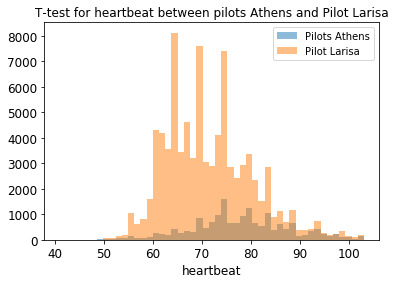

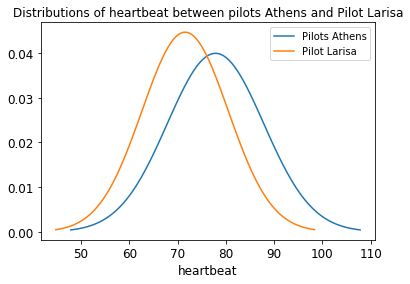

p-value for perfusionIndex = 0.0
perfusionIndex is significantly different between Pilots Athens and Pilot Larisa


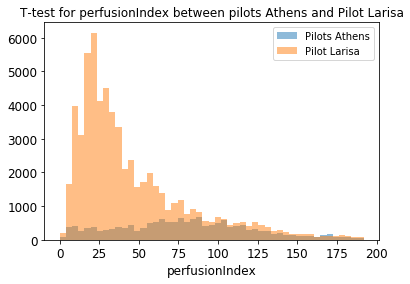

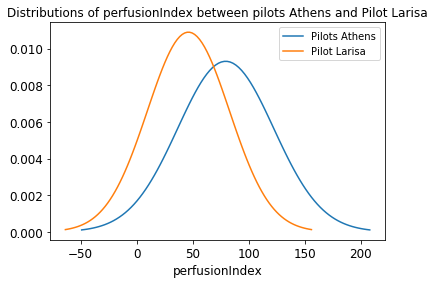

p-value for PPG_skew = 1.660263032146227e-22
PPG_skew is significantly different between Pilots Athens and Pilot Larisa


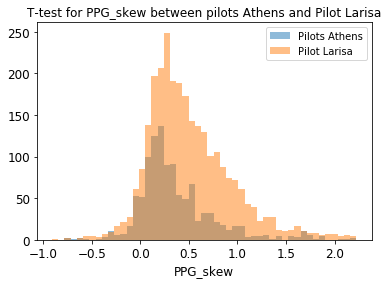

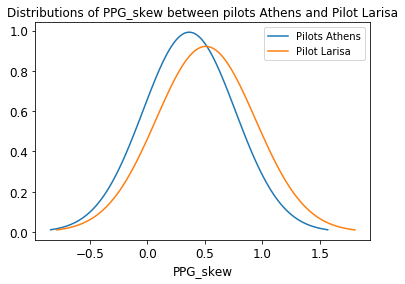

p-value for PPG_kurt = 2.3190166828905727e-07
PPG_kurt is significantly different between Pilots Athens and Pilot Larisa


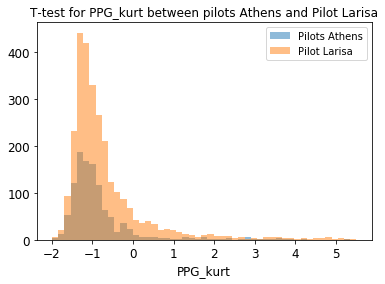

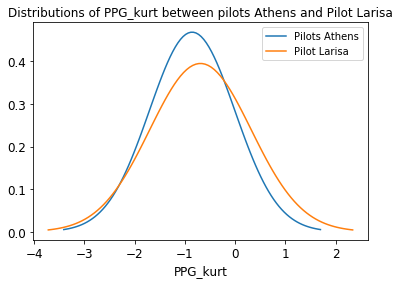

p-value for PPG_period = 1.0628871190736368e-15
PPG_period is significantly different between Pilots Athens and Pilot Larisa


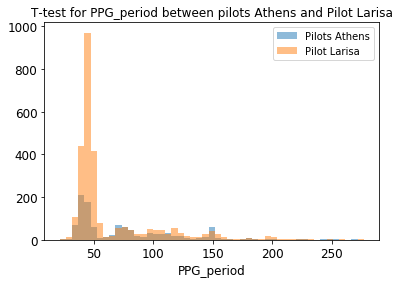

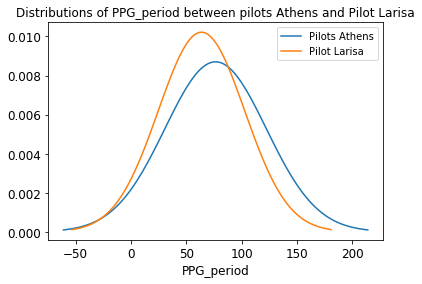

cannot calculate FEF2575 because of nan values
cannot calculate FEV1 because of nan values
p-value for FEV1_FVC = 0.002878457962071965
FEV1_FVC is significantly different between Pilots Athens and Pilot Crete


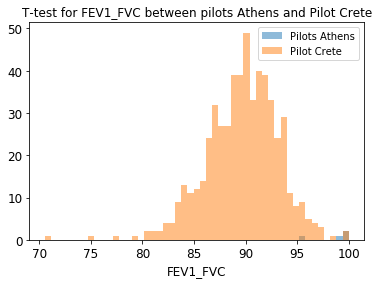

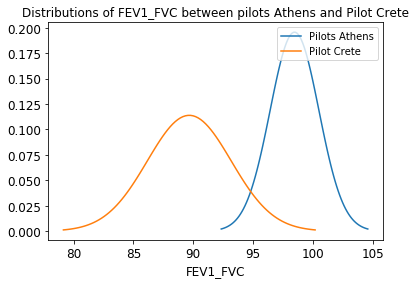

p-value for FEV6 = 0.009117923113509365
FEV6 is significantly different between Pilots Athens and Pilot Crete


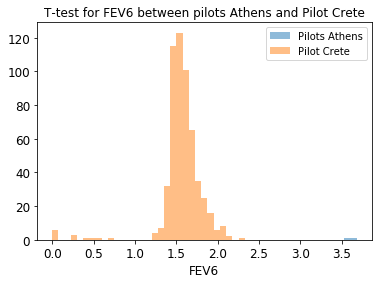

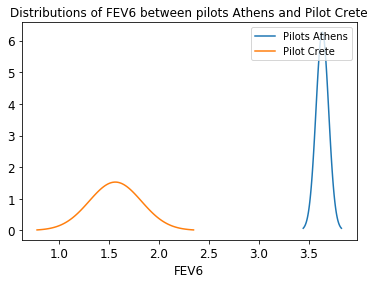

p-value for FVC = 0.0008269880064045446
FVC is significantly different between Pilots Athens and Pilot Crete


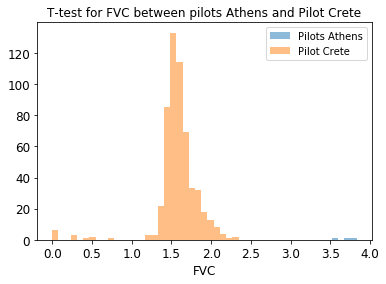

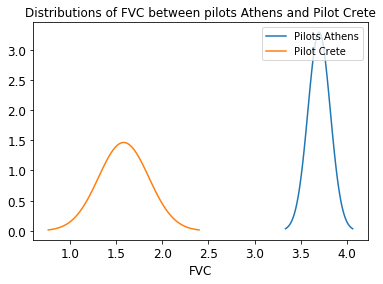

cannot calculate PEF because of nan values
p-value for bpm_sys = 1.497899084498085e-48
bpm_sys is significantly different between Pilots Athens and Pilot Crete


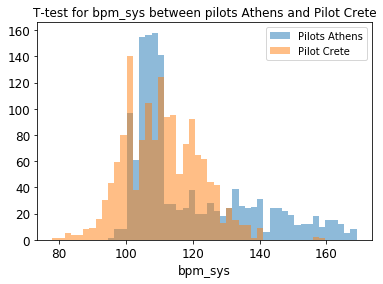

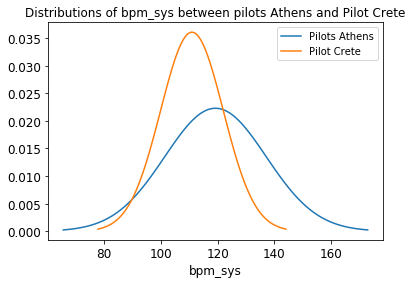

p-value for bpm_dia = 0.0026874082963680604
bpm_dia is significantly different between Pilots Athens and Pilot Crete


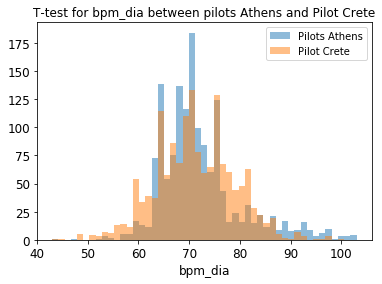

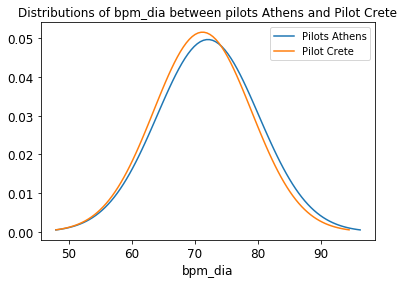

p-value for SpO2 = 5.464894240433731e-87
SpO2 is significantly different between Pilots Athens and Pilot Crete


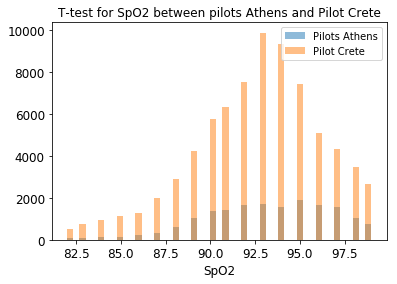

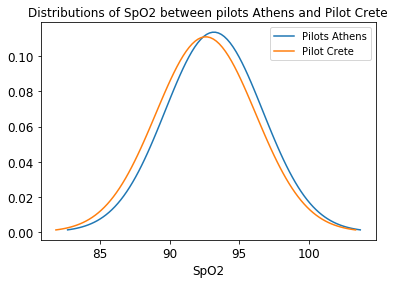

p-value for heartbeat = 0.0
heartbeat is significantly different between Pilots Athens and Pilot Crete


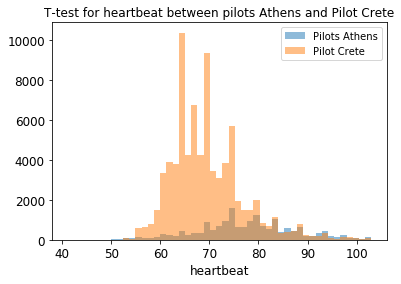

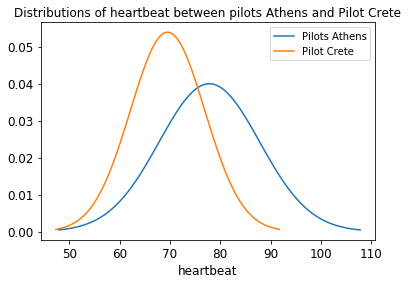

p-value for perfusionIndex = 0.0
perfusionIndex is significantly different between Pilots Athens and Pilot Crete


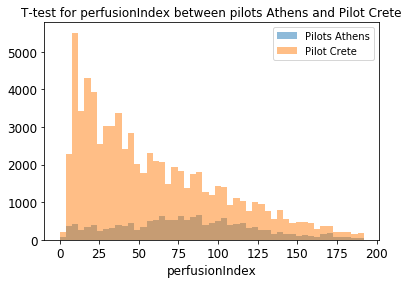

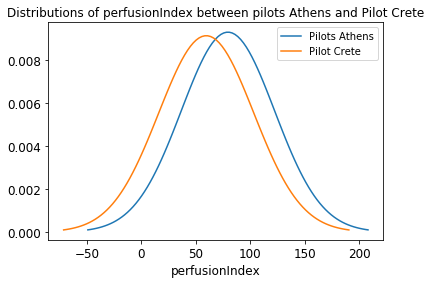

p-value for PPG_skew = 3.52043196231099e-53
PPG_skew is significantly different between Pilots Athens and Pilot Crete


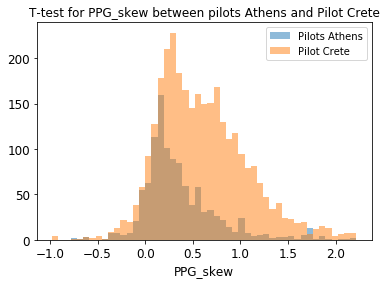

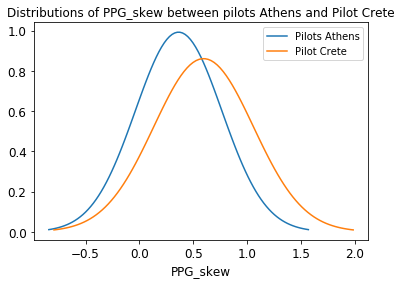

p-value for PPG_kurt = 3.856766184690744e-29
PPG_kurt is significantly different between Pilots Athens and Pilot Crete


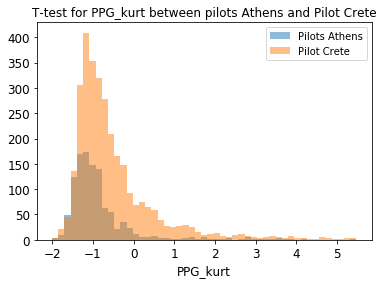

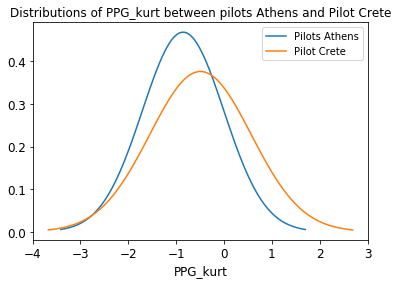

p-value for PPG_period = 3.7392862699165085e-42
PPG_period is significantly different between Pilots Athens and Pilot Crete


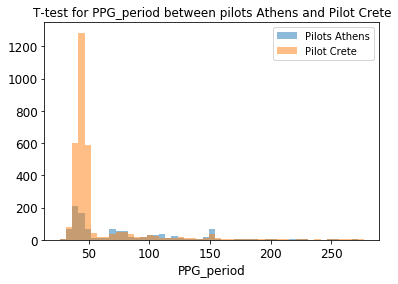

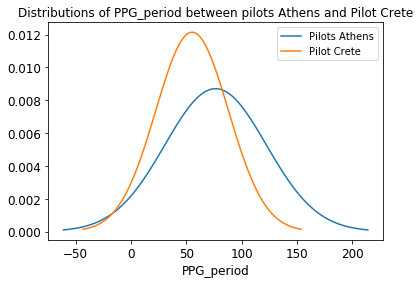

cannot calculate FEF2575 because of nan values
cannot calculate FEV1 because of nan values
cannot calculate FEV1_FVC because of nan values
cannot calculate FEV6 because of nan values
cannot calculate FVC because of nan values
cannot calculate PEF because of nan values
p-value for bpm_sys = 1.027297371524002e-12
bpm_sys is significantly different between Pilots Athens and Pilot Thessaloniki


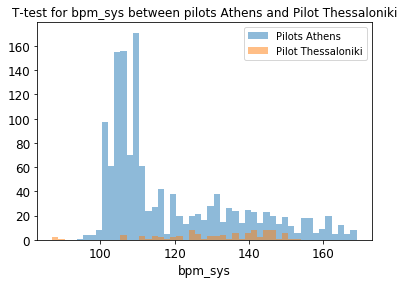

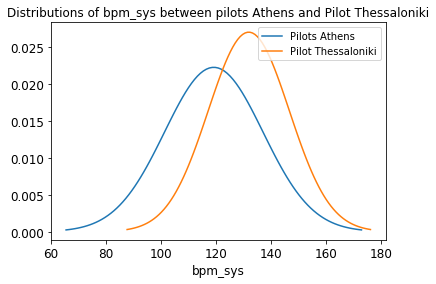

p-value for bpm_dia = 1.3705091104648028e-10
bpm_dia is significantly different between Pilots Athens and Pilot Thessaloniki


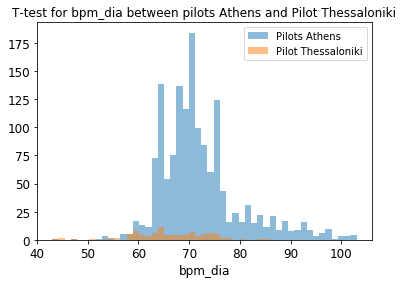

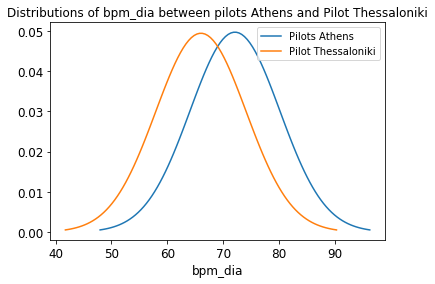

p-value for SpO2 = 1.173910837116082e-13
SpO2 is significantly different between Pilots Athens and Pilot Thessaloniki


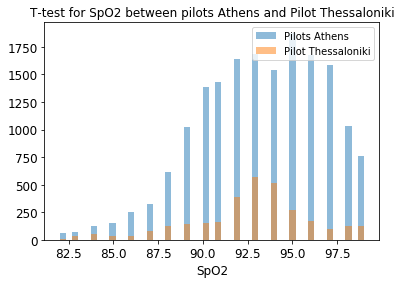

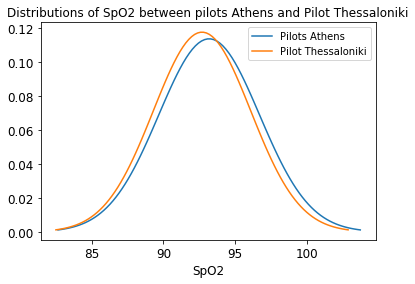

p-value for heartbeat = 5.929833801198432e-36
heartbeat is significantly different between Pilots Athens and Pilot Thessaloniki


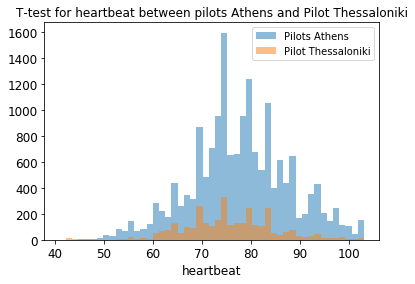

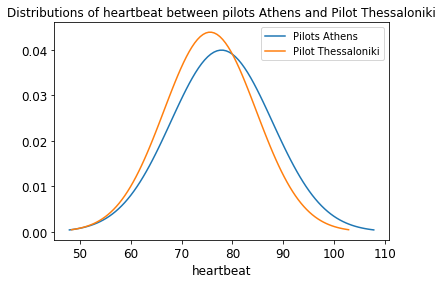

p-value for perfusionIndex = 4.048873166960866e-05
perfusionIndex is significantly different between Pilots Athens and Pilot Thessaloniki


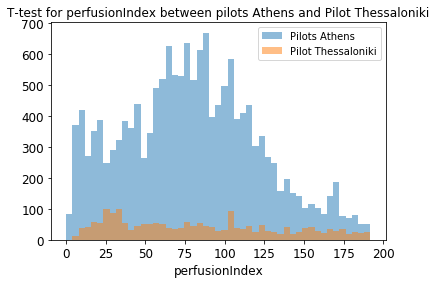

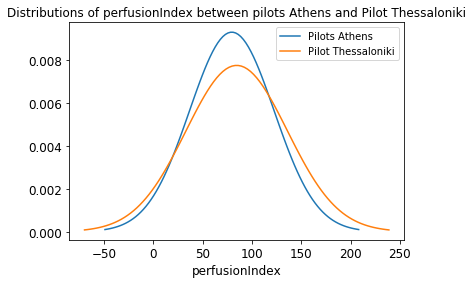

p-value for PPG_skew = 6.169326187311105e-25
PPG_skew is significantly different between Pilots Athens and Pilot Thessaloniki


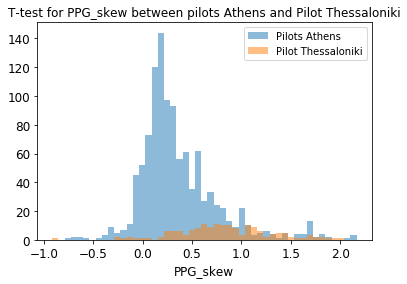

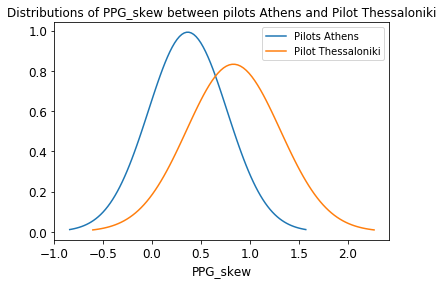

p-value for PPG_kurt = 1.1522923323804472e-10
PPG_kurt is significantly different between Pilots Athens and Pilot Thessaloniki


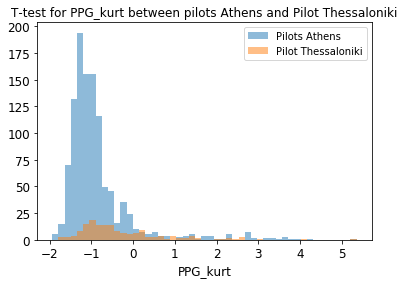

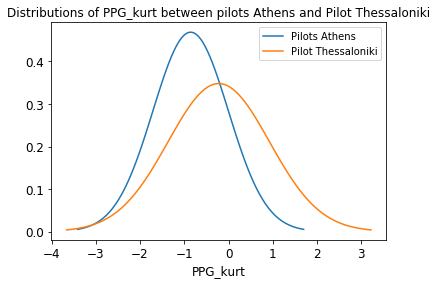

p-value for PPG_period = 0.4410753151444885
PPG_period is NOT significantly different between Pilots Athens and Pilot Thessaloniki


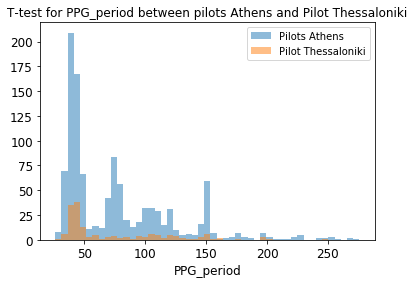

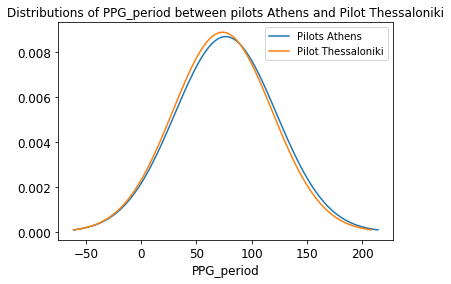

In [10]:
categories = list(['Pilot Larisa', 'Pilot Crete', 'Pilot Thessaloniki'])
for category in categories:
    df2 = dfcat[dfcat['CATEGORY'].isin(['Pilot Athens'])].drop(columns=['TIME','PATIENT_CODE', 'DATE', 'CATEGORY', 'GENDER', 'AGE', 'PPG', 'PPG_united'])
    df3 = dfcat[dfcat['CATEGORY'].isin([category])].drop(columns=['TIME','PATIENT_CODE', 'DATE', 'CATEGORY', 'GENDER', 'AGE', 'PPG', 'PPG_united'])
    for column in columns:
        if (len(df2[column].dropna()) !=0) & (len(df3[column].dropna()) !=0):
            stat, p = ttest_ind(df2[column].dropna(), df3[column].dropna(), equal_var=False)
            print 'p-value for', column, '=', p
            if p < 0.05:
                print column, 'is significantly different between Pilots Athens and', category
            else:
                print column, 'is NOT significantly different between Pilots Athens and', category
            bins = np.linspace(np.minimum(df2[column].min(), df3[column].min()), np.maximum(df2[column].max(), df3[column].max()), 50)
            plt.hist(df2[column].dropna(), bins, alpha=0.5, label='Pilots Athens')
            plt.hist(df3[column].dropna(), bins, alpha=0.5, label=category)
            plt.legend(loc='upper right', prop={'size': 10})
            plt.xlabel(column)
            plt.title('T-test for ' + column + ' between pilots Athens and ' + category, fontsize=12)
            plt.savefig('patients/ttest/' + column + 'pilots_Athens_and' + category + '.svg', format='svg', dpi=600, bbox_inches = "tight")
            plt.show()
            mu1 = df2[column].dropna().mean()
            variance1 = df2[column].dropna().var()
            sigma1 = math.sqrt(variance1)
            x1 = np.linspace(mu1 - 3*sigma1, mu1 + 3*sigma1, 100)
            mu2 = df3[column].dropna().mean()
            variance2 = df3[column].dropna().var()
            sigma2 = math.sqrt(variance2)
            x2 = np.linspace(mu2 - 3*sigma2, mu2 + 3*sigma2, 100)
            plt.plot(x1,norm.pdf(x1, mu1, sigma1), label='Pilots Athens')
            plt.plot(x2,norm.pdf(x2, mu2, sigma2), label=category)
            plt.legend(loc='upper right', prop={'size': 10})
            plt.xlabel(column)
            plt.title('Distributions of ' + column + ' between pilots Athens and ' + category, fontsize=12)
            plt.savefig('patients/ttest/' + column + 'pilots_Athens_and' + category + '2.svg', format='svg', dpi=600, bbox_inches = "tight")
            plt.show()
        else:
            print 'cannot calculate', column, 'because of nan values'


cannot calculate FEF2575 because of nan values
cannot calculate FEV1 because of nan values
cannot calculate FEV1_FVC because of nan values
cannot calculate FEV6 because of nan values
cannot calculate FVC because of nan values
cannot calculate PEF because of nan values
p-value for bpm_sys = 9.448415897353405e-06
bpm_sys is significantly different between Pilots Thessaloniki and Pilot Larisa


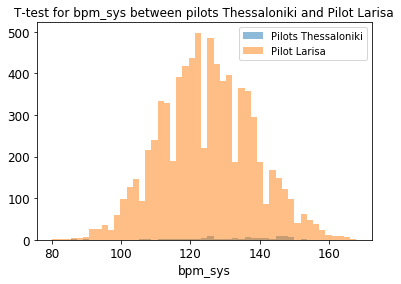

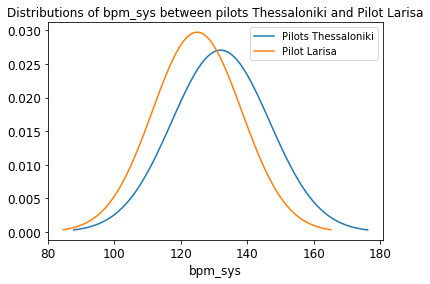

p-value for bpm_dia = 8.584174180447083e-15
bpm_dia is significantly different between Pilots Thessaloniki and Pilot Larisa


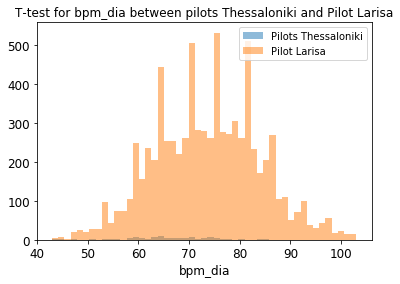

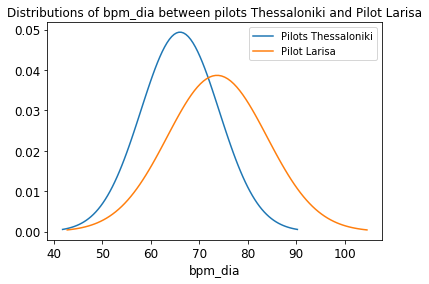

p-value for SpO2 = 6.450417740886287e-193
SpO2 is significantly different between Pilots Thessaloniki and Pilot Larisa


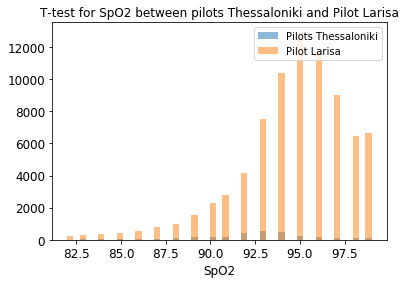

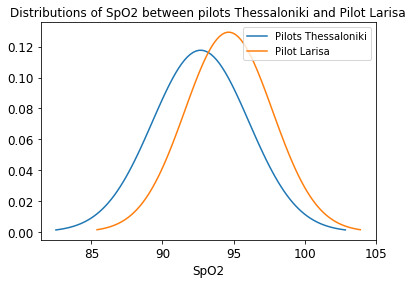

p-value for heartbeat = 2.8910335893278923e-121
heartbeat is significantly different between Pilots Thessaloniki and Pilot Larisa


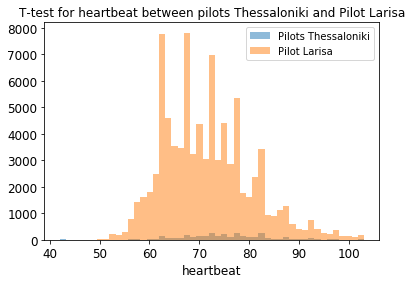

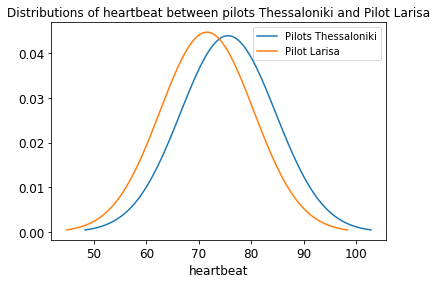

p-value for perfusionIndex = 1.8954042241612164e-190
perfusionIndex is significantly different between Pilots Thessaloniki and Pilot Larisa


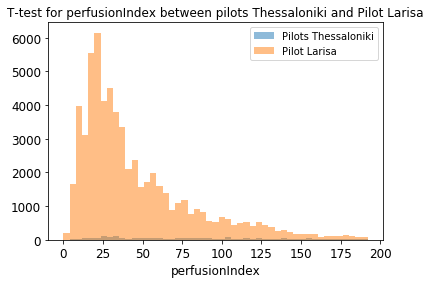

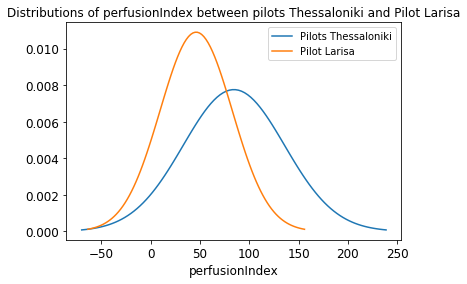

p-value for PPG_skew = 1.2054145708708639e-14
PPG_skew is significantly different between Pilots Thessaloniki and Pilot Larisa


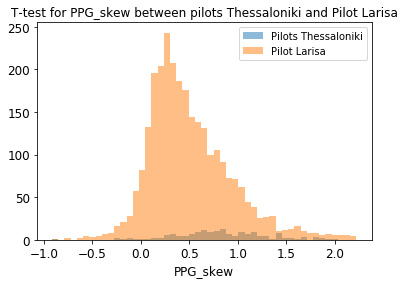

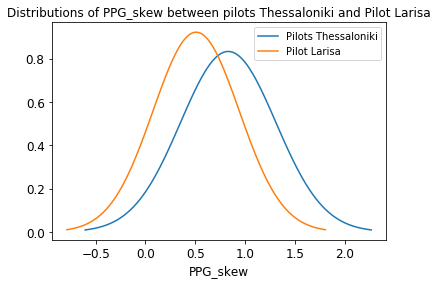

p-value for PPG_kurt = 7.701329798596641e-07
PPG_kurt is significantly different between Pilots Thessaloniki and Pilot Larisa


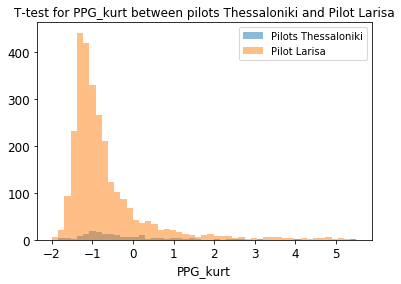

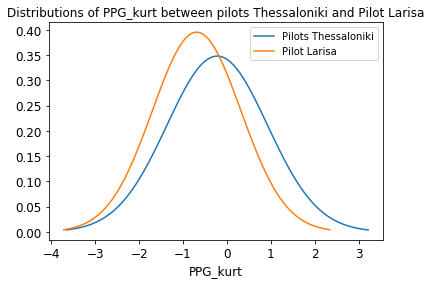

p-value for PPG_period = 0.006123647613202702
PPG_period is significantly different between Pilots Thessaloniki and Pilot Larisa


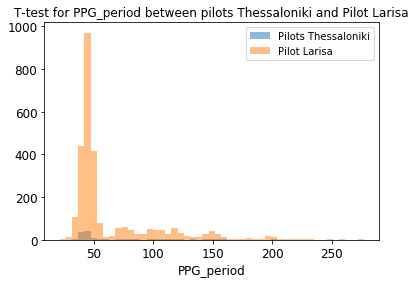

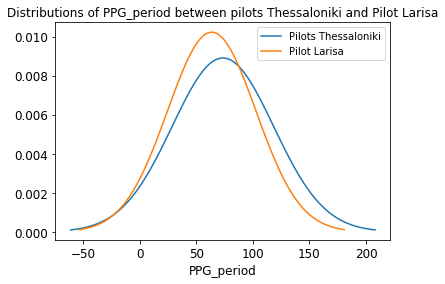

cannot calculate FEF2575 because of nan values
cannot calculate FEV1 because of nan values
cannot calculate FEV1_FVC because of nan values
cannot calculate FEV6 because of nan values
cannot calculate FVC because of nan values
cannot calculate PEF because of nan values
p-value for bpm_sys = 1.1370181513810567e-24
bpm_sys is significantly different between Pilots Thessaloniki and Pilot Crete


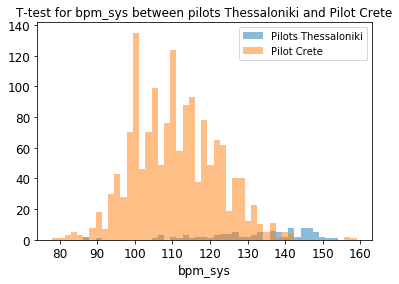

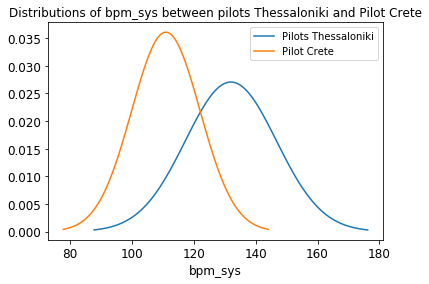

p-value for bpm_dia = 1.6280540756309615e-08
bpm_dia is significantly different between Pilots Thessaloniki and Pilot Crete


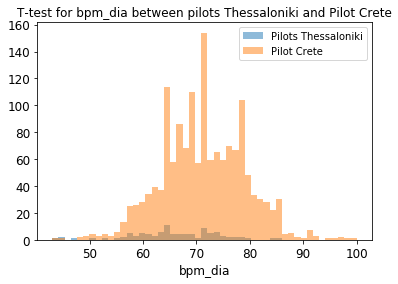

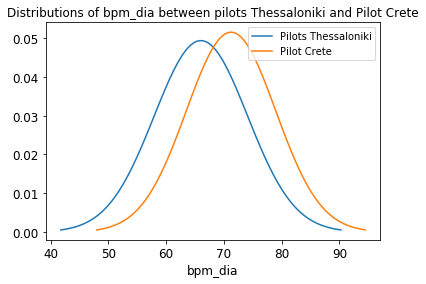

p-value for SpO2 = 0.13514450783972579
SpO2 is NOT significantly different between Pilots Thessaloniki and Pilot Crete


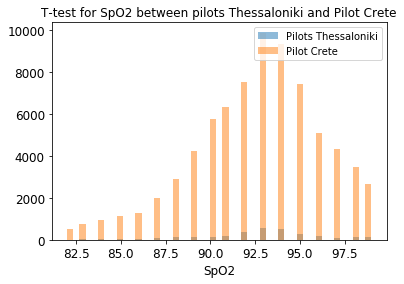

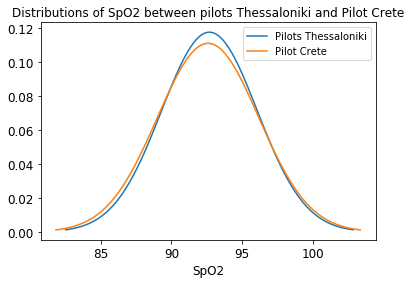

p-value for heartbeat = 7.098112147535241e-248
heartbeat is significantly different between Pilots Thessaloniki and Pilot Crete


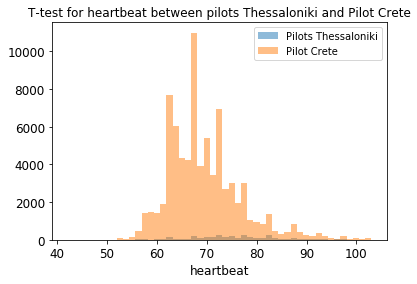

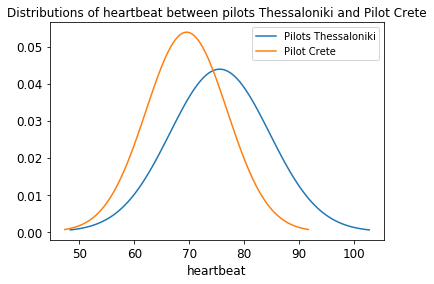

p-value for perfusionIndex = 2.5200102780051323e-91
perfusionIndex is significantly different between Pilots Thessaloniki and Pilot Crete


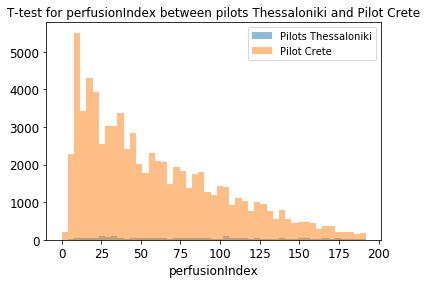

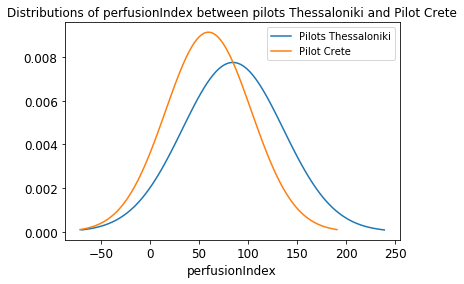

p-value for PPG_skew = 5.56023573127992e-09
PPG_skew is significantly different between Pilots Thessaloniki and Pilot Crete


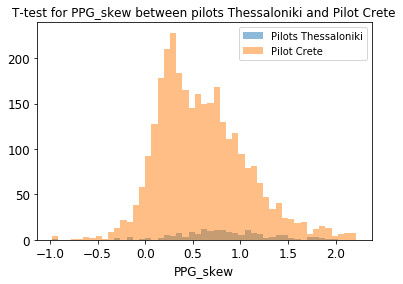

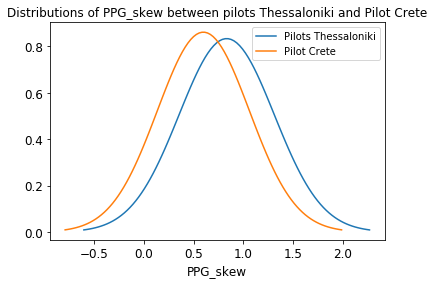

p-value for PPG_kurt = 0.0033487852970139507
PPG_kurt is significantly different between Pilots Thessaloniki and Pilot Crete


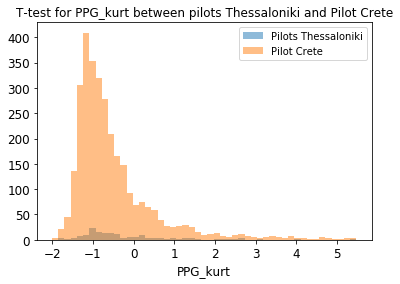

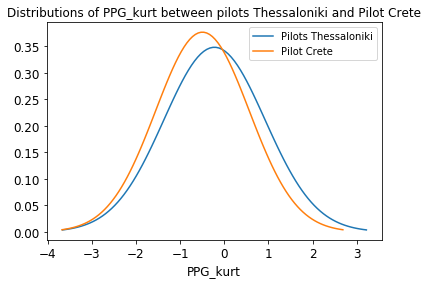

p-value for PPG_period = 5.730370873961251e-07
PPG_period is significantly different between Pilots Thessaloniki and Pilot Crete


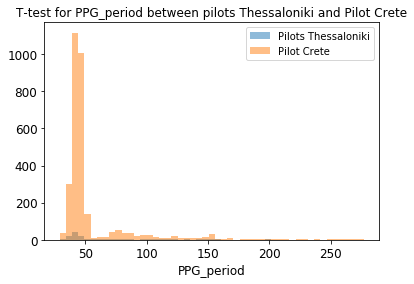

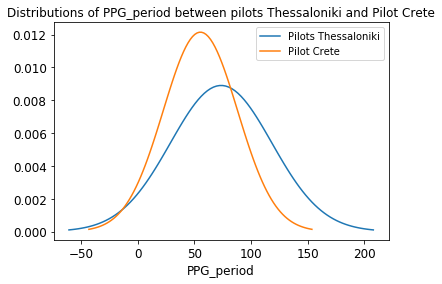

cannot calculate FEF2575 because of nan values
cannot calculate FEV1 because of nan values
cannot calculate FEV1_FVC because of nan values
cannot calculate FEV6 because of nan values
cannot calculate FVC because of nan values
cannot calculate PEF because of nan values
p-value for bpm_sys = 1.027297371524002e-12
bpm_sys is significantly different between Pilots Thessaloniki and Pilot Athens


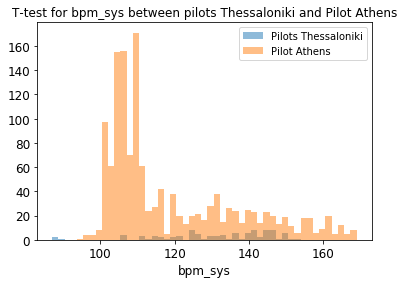

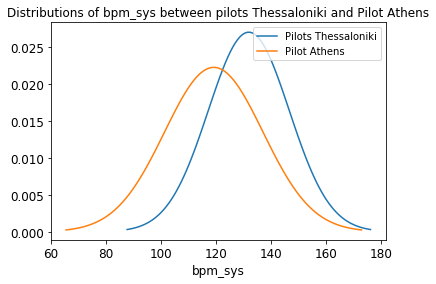

p-value for bpm_dia = 1.3705091104648028e-10
bpm_dia is significantly different between Pilots Thessaloniki and Pilot Athens


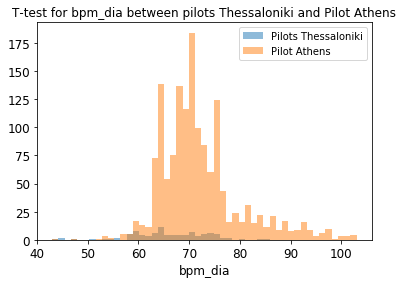

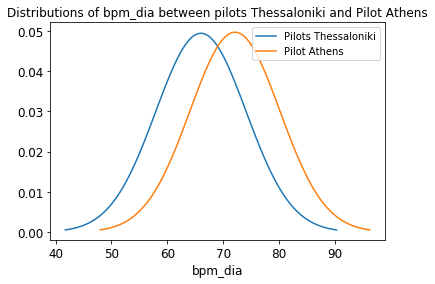

p-value for SpO2 = 1.173910837116082e-13
SpO2 is significantly different between Pilots Thessaloniki and Pilot Athens


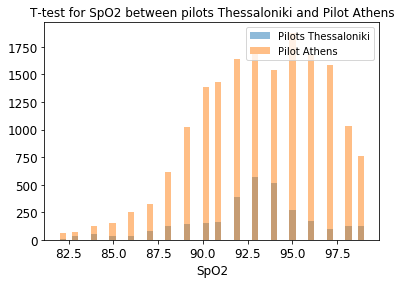

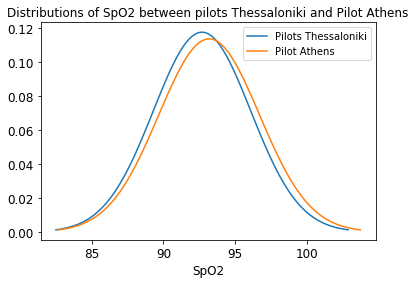

p-value for heartbeat = 5.929833801198432e-36
heartbeat is significantly different between Pilots Thessaloniki and Pilot Athens


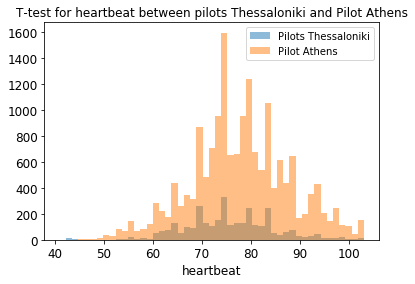

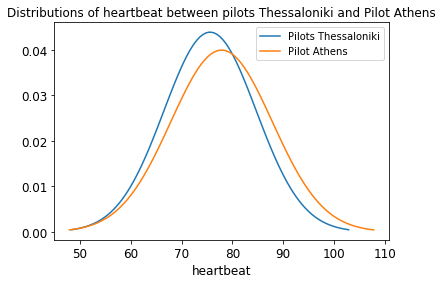

p-value for perfusionIndex = 4.048873166960866e-05
perfusionIndex is significantly different between Pilots Thessaloniki and Pilot Athens


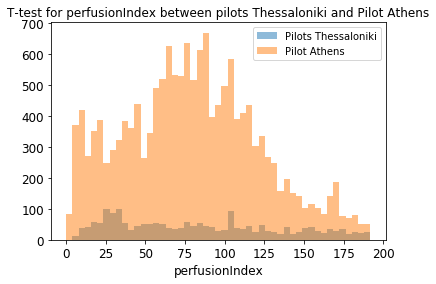

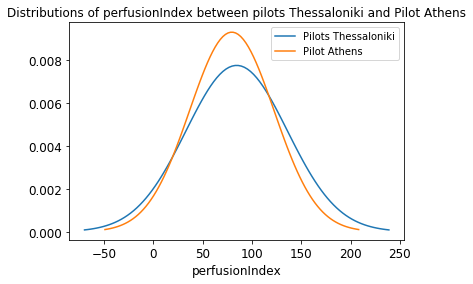

p-value for PPG_skew = 6.169326187311105e-25
PPG_skew is significantly different between Pilots Thessaloniki and Pilot Athens


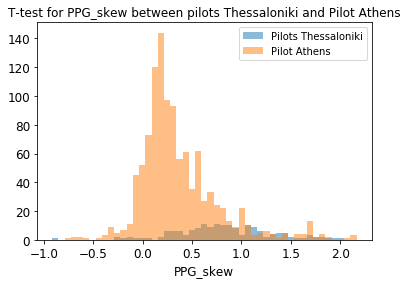

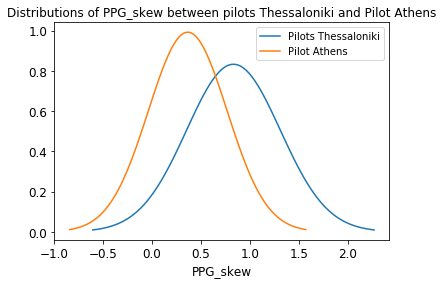

p-value for PPG_kurt = 1.1522923323804472e-10
PPG_kurt is significantly different between Pilots Thessaloniki and Pilot Athens


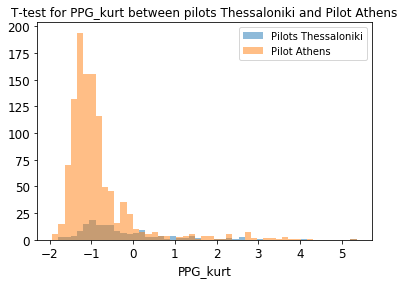

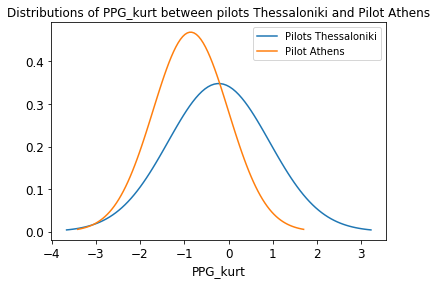

p-value for PPG_period = 0.4410753151444885
PPG_period is NOT significantly different between Pilots Thessaloniki and Pilot Athens


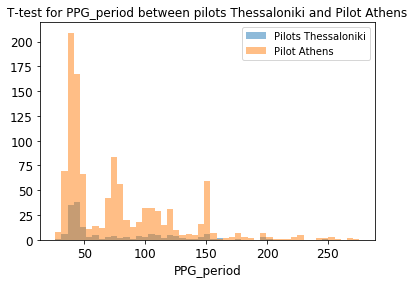

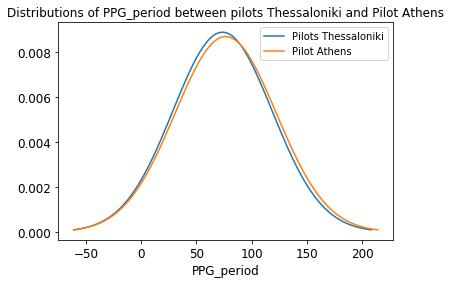

In [11]:

#Check if columns are different between pilots Thessaloniki and the other pilot categories using Welch’s t-test
categories = list(['Pilot Larisa', 'Pilot Crete', 'Pilot Athens'])
for category in categories:
    df2 = dfcat[dfcat['CATEGORY'].isin(['Pilot Thessaloniki'])].drop(columns=['TIME','PATIENT_CODE', 'DATE', 'CATEGORY', 'GENDER', 'AGE', 'PPG', 'PPG_united'])
    df3 = dfcat[dfcat['CATEGORY'].isin([category])].drop(columns=['TIME','PATIENT_CODE', 'DATE', 'CATEGORY', 'GENDER', 'AGE', 'PPG', 'PPG_united'])
    for column in columns:
        if (len(df2[column].dropna()) !=0) & (len(df3[column].dropna()) !=0):
            stat, p = ttest_ind(df2[column].dropna(), df3[column].dropna(), equal_var=False)
            print 'p-value for', column, '=', p
            if p < 0.05:
                print column, 'is significantly different between Pilots Thessaloniki and', category
            else:
                print column, 'is NOT significantly different between Pilots Thessaloniki and', category
            bins = np.linspace(np.minimum(df2[column].min(), df3[column].min()), np.maximum(df2[column].max(), df3[column].max()), 50)
            plt.hist(df2[column].dropna(), bins, alpha=0.5, label='Pilots Thessaloniki')
            plt.hist(df3[column].dropna(), bins, alpha=0.5, label=category)
            plt.legend(loc='upper right', prop={'size': 10})
            plt.xlabel(column)
            plt.title('T-test for ' + column + ' between pilots Thessaloniki and ' + category, fontsize=12)
            plt.savefig('patients/ttest/' + column + 'pilots_Thessaloniki_and' + category + '.svg', format='svg', dpi=600, bbox_inches = "tight")
            plt.show()
            mu1 = df2[column].dropna().mean()
            variance1 = df2[column].dropna().var()
            sigma1 = math.sqrt(variance1)
            x1 = np.linspace(mu1 - 3*sigma1, mu1 + 3*sigma1, 100)
            mu2 = df3[column].dropna().mean()
            variance2 = df3[column].dropna().var()
            sigma2 = math.sqrt(variance2)
            x2 = np.linspace(mu2 - 3*sigma2, mu2 + 3*sigma2, 100)
            plt.plot(x1,norm.pdf(x1, mu1, sigma1), label='Pilots Thessaloniki')
            plt.plot(x2,norm.pdf(x2, mu2, sigma2), label=category)
            plt.legend(loc='upper right', prop={'size': 10})
            plt.xlabel(column)
            plt.title('Distributions of ' + column + ' between pilots Thessaloniki and ' + category, fontsize=12)
            plt.savefig('patients/ttest/' + column + 'pilots_Thessaloniki_and' + category + '2.svg', format='svg', dpi=600, bbox_inches = "tight")
            plt.show()
        else:
            print 'cannot calculate', column, 'because of nan values'
